<div style="background-color: #145D91; color: white; font-variant: small-caps; padding: 10px; text-align: center;">
  <span style="font-size: 14pt;">Part 03 B:</span>
  <span style="font-size: 26pt; font-weight: bold;"> Data Visualization</span><br>
</div>

<div style="background-color: #145D91; color: white; padding: 10px; text-align: center;">
  <span style="font-size: 14pt; font-weight: bold; font-color: #87B5D6"> Analyzing Entry Trends and COVID-19 Effects on U.S. Borders</span><br>  
</div>

<div style="background-color: #2A7AB8; padding: 10px; margin-top: 10px;">
  <b>Importing Python libraries and loading required dataset.</b>
</div>

In [214]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import math
import plotly.express as px
import plotly.graph_objects as go
import math
import seaborn as sns
from matplotlib.ticker import MaxNLocator


In [215]:

#state_table
file_path_state_table = '../Capstone Project/state_table.csv'
state_table = pd.read_csv(file_path_state_table)
print('"state_table" loaded')
#border_table
file_path_border_table = '../Capstone Project/border_table.csv'
border_table = pd.read_csv(file_path_border_table)
print('"border_table" loaded')
#measure_table
file_path_measure_table = '../Capstone Project/measure_table.csv'
measure_table = pd.read_csv(file_path_measure_table)
print('"measure_table" loaded')
#port_table
file_path_port_table = '../Capstone Project/port_table.csv'
port_table = pd.read_csv(file_path_port_table)
print('"port_table" loaded')
#month_table
file_path_month_table = '../Capstone Project/month_table.csv'
month_table = pd.read_csv(file_path_month_table)
print('"month_table" loaded')
#finalized_broder_crossing_df
file_path_finalized_broder_crossing_df = '../Capstone Project/finalized_broder_crossing_df.csv'
finalized_broder_crossing_df = pd.read_csv(file_path_finalized_broder_crossing_df)
print('"finalized_broder_crossing_df" loaded')

"state_table" loaded
"border_table" loaded
"measure_table" loaded
"port_table" loaded
"month_table" loaded
"finalized_broder_crossing_df" loaded


<div style="background-color: #2A7AB8; padding: 10px;">
<b>Temporal Patterns in Entry Data<b>
</div>

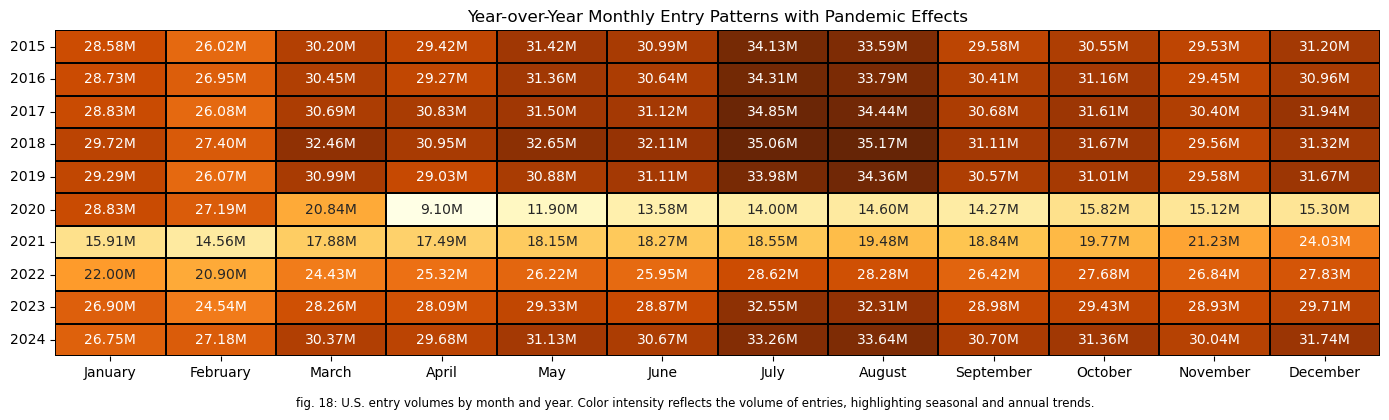

In [216]:

# Group by 'Month' (numeric) and sum 'Value'
year_month_entry = finalized_broder_crossing_df.groupby(['Year', 'Month'])['Value'].sum().reset_index()

# Merge on numeric month to get month names
year_month_entry = year_month_entry.merge(month_table, left_on='Month', right_on='Month_Number', how='left')

year_month_entry = year_month_entry.drop(columns=['Month_x'])

year_month_entry = year_month_entry.rename(columns={'Month_y': 'Month'})

year_month_entry = year_month_entry[['Year', 'Month', 'Value', 'Month_Number']]

# --- Sort using Month_Number to ensure correct order ---
year_month_entry = year_month_entry.sort_values(by=['Year', 'Month_Number'])

# --- Convert Month to categorical using Month_Number order ---
month_order = year_month_entry.sort_values('Month_Number')['Month'].unique()
year_month_entry['Month'] = pd.Categorical(
    year_month_entry['Month'], categories=month_order, ordered=True
)

# --- Pivot data for heatmap ---
heatmap_data = year_month_entry.pivot(index='Year', columns='Month', values='Value')

# --- Format values in "M" (millions) for display ---
annot_data = heatmap_data.map(lambda x: f'{x / 1e6:.2f}M' if pd.notnull(x) else '')

# --- Plot heatmap ---
plt.figure(figsize=(14, 4))
sns.heatmap(
    heatmap_data, annot=annot_data, fmt='', cmap='YlOrBr', linewidths=0.3, linecolor='black', cbar=False
)

plt.title('Year-over-Year Monthly Entry Patterns with Pandemic Effects')
plt.xlabel('')
plt.ylabel('')
plt.yticks(rotation=0)
plt.figtext(0.5, -0.03, 'fig. 18: U.S. entry volumes by month and year. Color intensity reflects the volume of entries, highlighting seasonal and annual trends.', ha='center', fontsize=8.5, fontstyle='normal')
plt.tight_layout()
plt.show()


<div style="background-color: #2A7AB8; padding: 10px;">
<b><b>
</div>

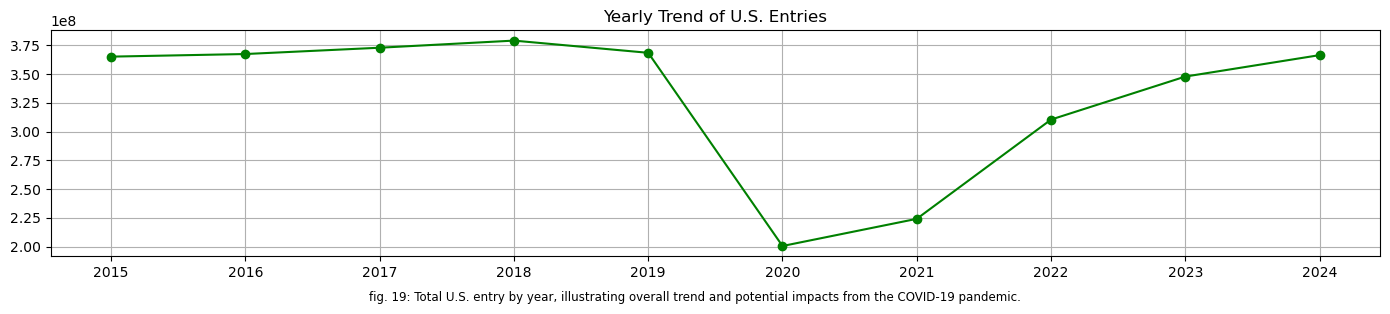

In [217]:

year_entry = finalized_broder_crossing_df.groupby('Year')['Value'].sum().reset_index()
# line chart
plt.figure(figsize=(14,3))
plt.plot(year_entry['Year'], year_entry['Value'], marker='o', linestyle='-', color='green')
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
plt.title('Yearly Trend of U.S. Entries')
plt.xlabel('')
plt.grid(True)
plt.figtext(0.5, -0.02, 'fig. 19: Total U.S. entry by year, illustrating overall trend and potential impacts from the COVID-19 pandemic.', ha='center', fontsize=8.5, fontstyle='normal')
plt.tight_layout()
plt.show()


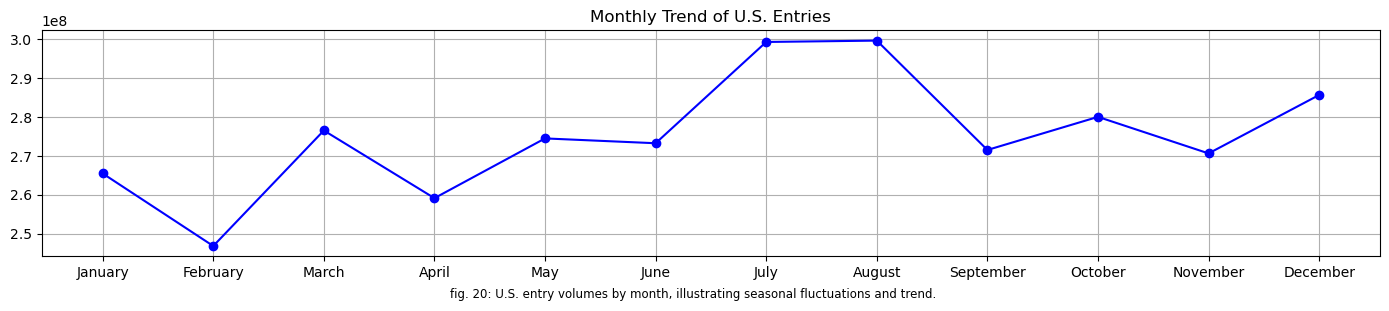

In [218]:

month_entry = finalized_broder_crossing_df.groupby('Month')['Value'].sum().reset_index()
month_entry = month_entry.merge(month_table, left_on='Month', right_on='Month_Number', how='left')
month_entry = month_entry.drop(columns=['Month_x', 'Month_Number'])
month_entry = month_entry.rename(columns={'Month_y': 'Month'})
month_entry = month_entry[['Month', 'Value']]

# Plot line chart
plt.figure(figsize=(14,3))
plt.plot(month_entry['Month'], month_entry['Value'], marker='o', linestyle='-', color='blue')
plt.title('Monthly Trend of U.S. Entries')
plt.xlabel('')
plt.ylabel('')
plt.xticks(rotation=0)
plt.grid(True)
plt.figtext(0.5, -0.01, 'fig. 20: U.S. entry volumes by month, illustrating seasonal fluctuations and trend. ', ha='center', fontsize=8.5, fontstyle='normal')
plt.tight_layout()
plt.show()

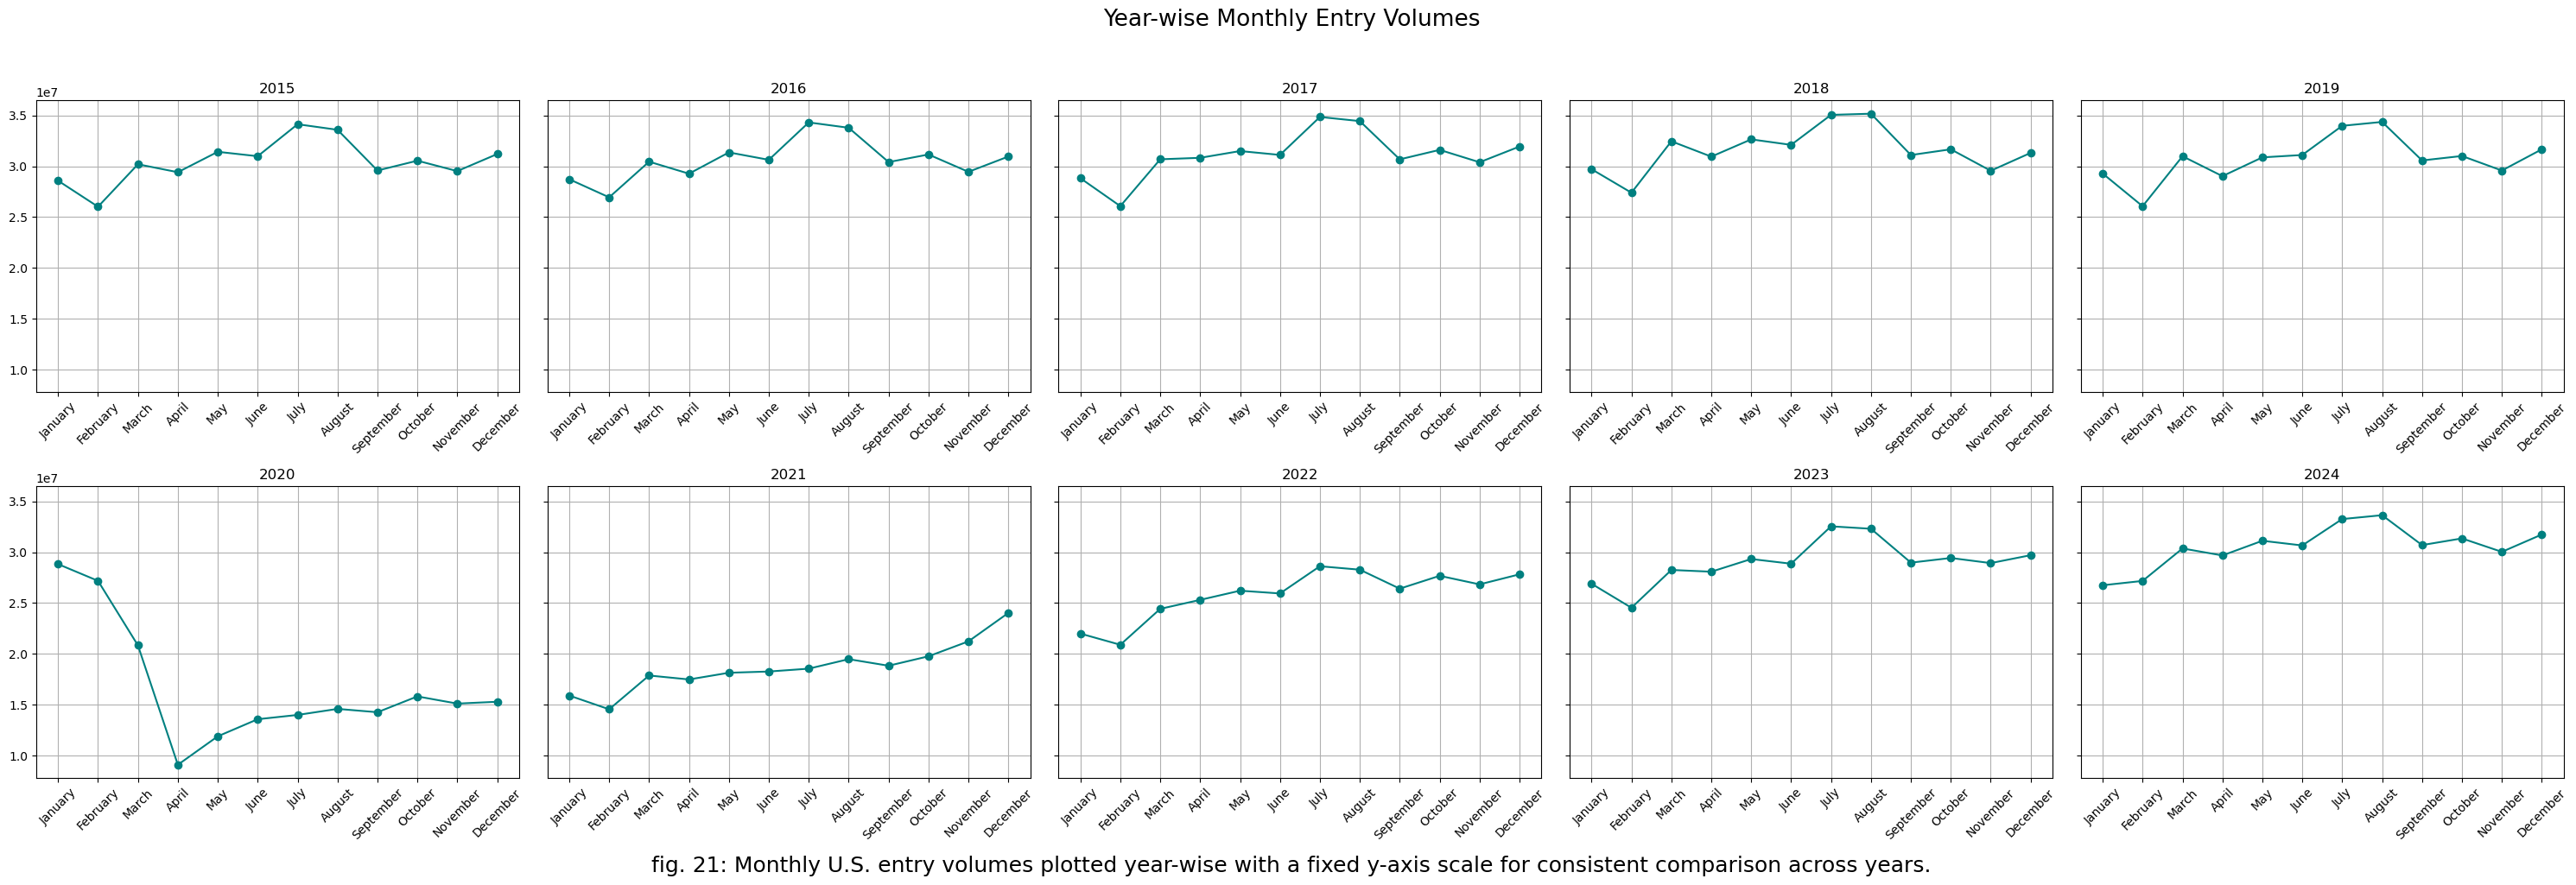

In [219]:

# Unique years
unique_years = year_month_entry['Year'].unique()
total_years = len(unique_years)

# Layout: 5 charts per row
cols = 5
rows = math.ceil(total_years / cols)

# Create subplots
fig, axes = plt.subplots(rows, cols, figsize=(6 * cols, 5 * rows), sharey=True)

# Flatten axes array for easy indexing
axes = axes.flatten()

# Plot each year's data
for i, year in enumerate(unique_years):
    yearly_data = year_month_entry[year_month_entry['Year'] == year]
    axes[i].plot(yearly_data['Month'], yearly_data['Value'], marker='o', color='teal')
    axes[i].set_title(f'{year}')
    axes[i].set_xlabel('')
    axes[i].tick_params(axis='x', rotation=45)
    if i % cols == 0:
        axes[i].set_ylabel('')
    axes[i].grid(True)

# Hide any unused subplots
for j in range(len(unique_years), len(axes)):
    fig.delaxes(axes[j])

plt.suptitle('Year-wise Monthly Entry Volumes', fontsize=19)
plt.figtext(0.5, -0.02, 'fig. 21: Monthly U.S. entry volumes plotted year-wise with a fixed y-axis scale for consistent comparison across years.', ha='center', fontsize=18, fontstyle='normal')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

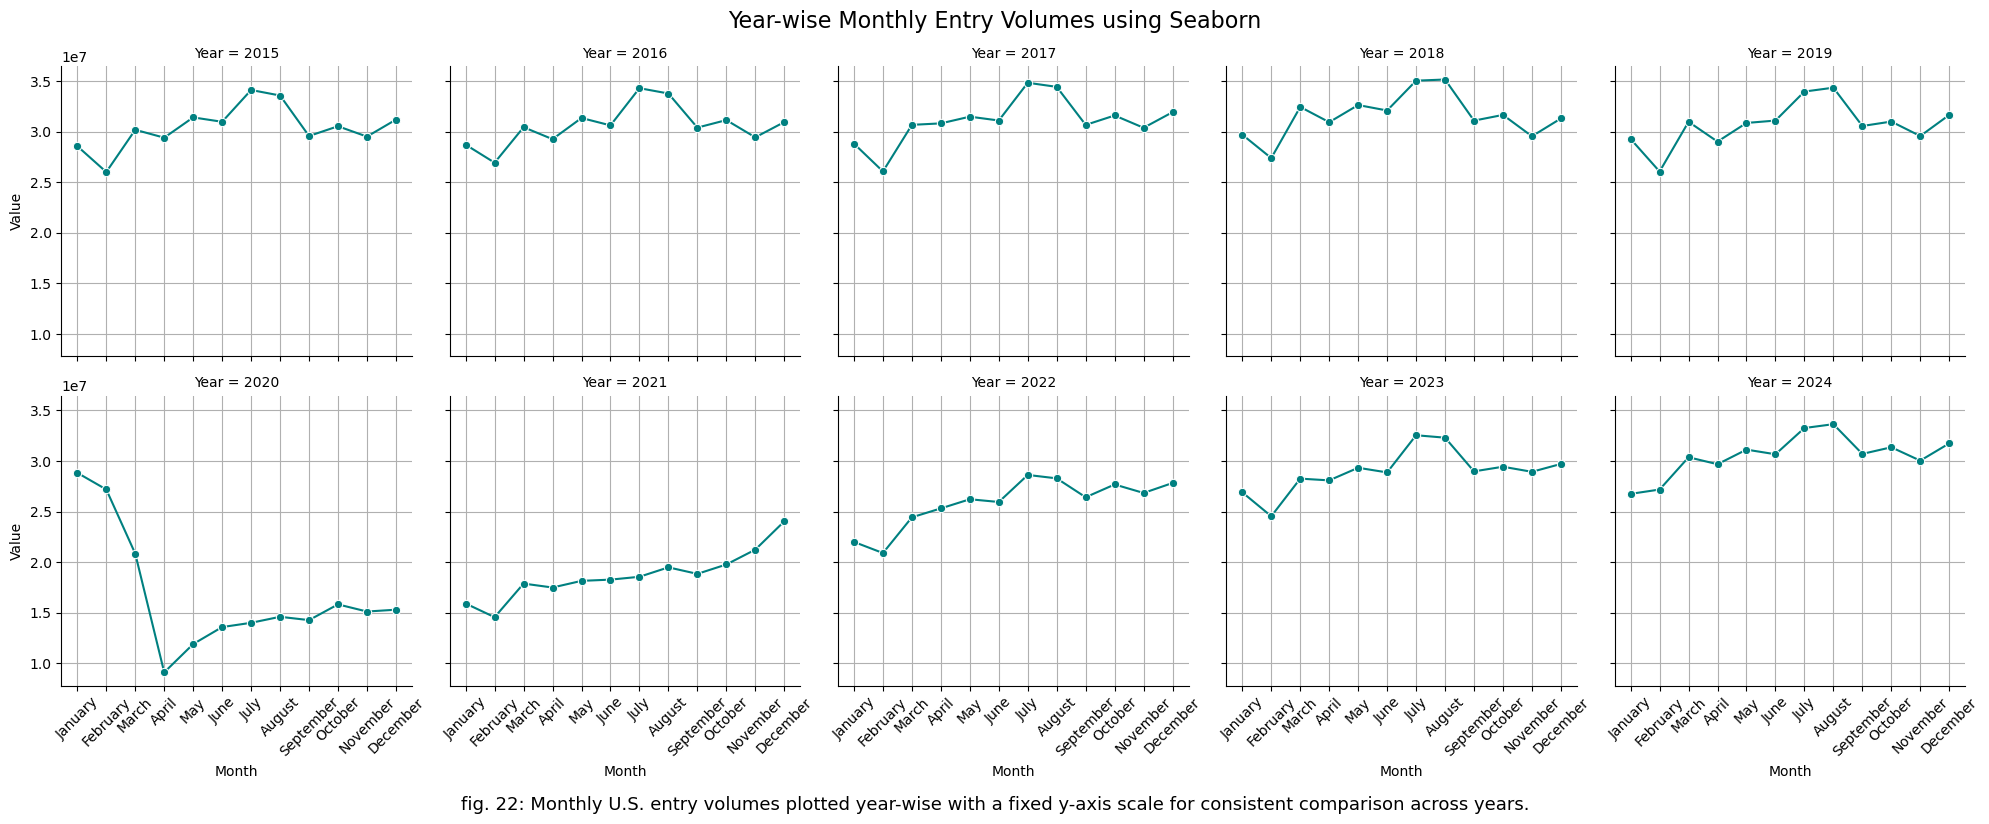

In [220]:

# Create FacetGrid: 5 charts per row
g = sns.FacetGrid(year_month_entry, col='Year', col_wrap=5, height=4, sharey=True)

# Map lineplot onto grid
g.map_dataframe(sns.lineplot, x='Month', y='Value', marker='o', color='teal')

# Rotate x labels and adjust layout
for ax in g.axes.flatten():
    ax.tick_params(axis='x', rotation=45)
    ax.grid(True)

g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Year-wise Monthly Entry Volumes using Seaborn', fontsize=16)
plt.figtext(0.5, -0.02, 'fig. 22: Monthly U.S. entry volumes plotted year-wise with a fixed y-axis scale for consistent comparison across years.', ha='center', fontsize=13, fontstyle='normal')
plt.tight_layout()
plt.show()

<div style="background-color: #2A7AB8; padding: 10px;">
</div>

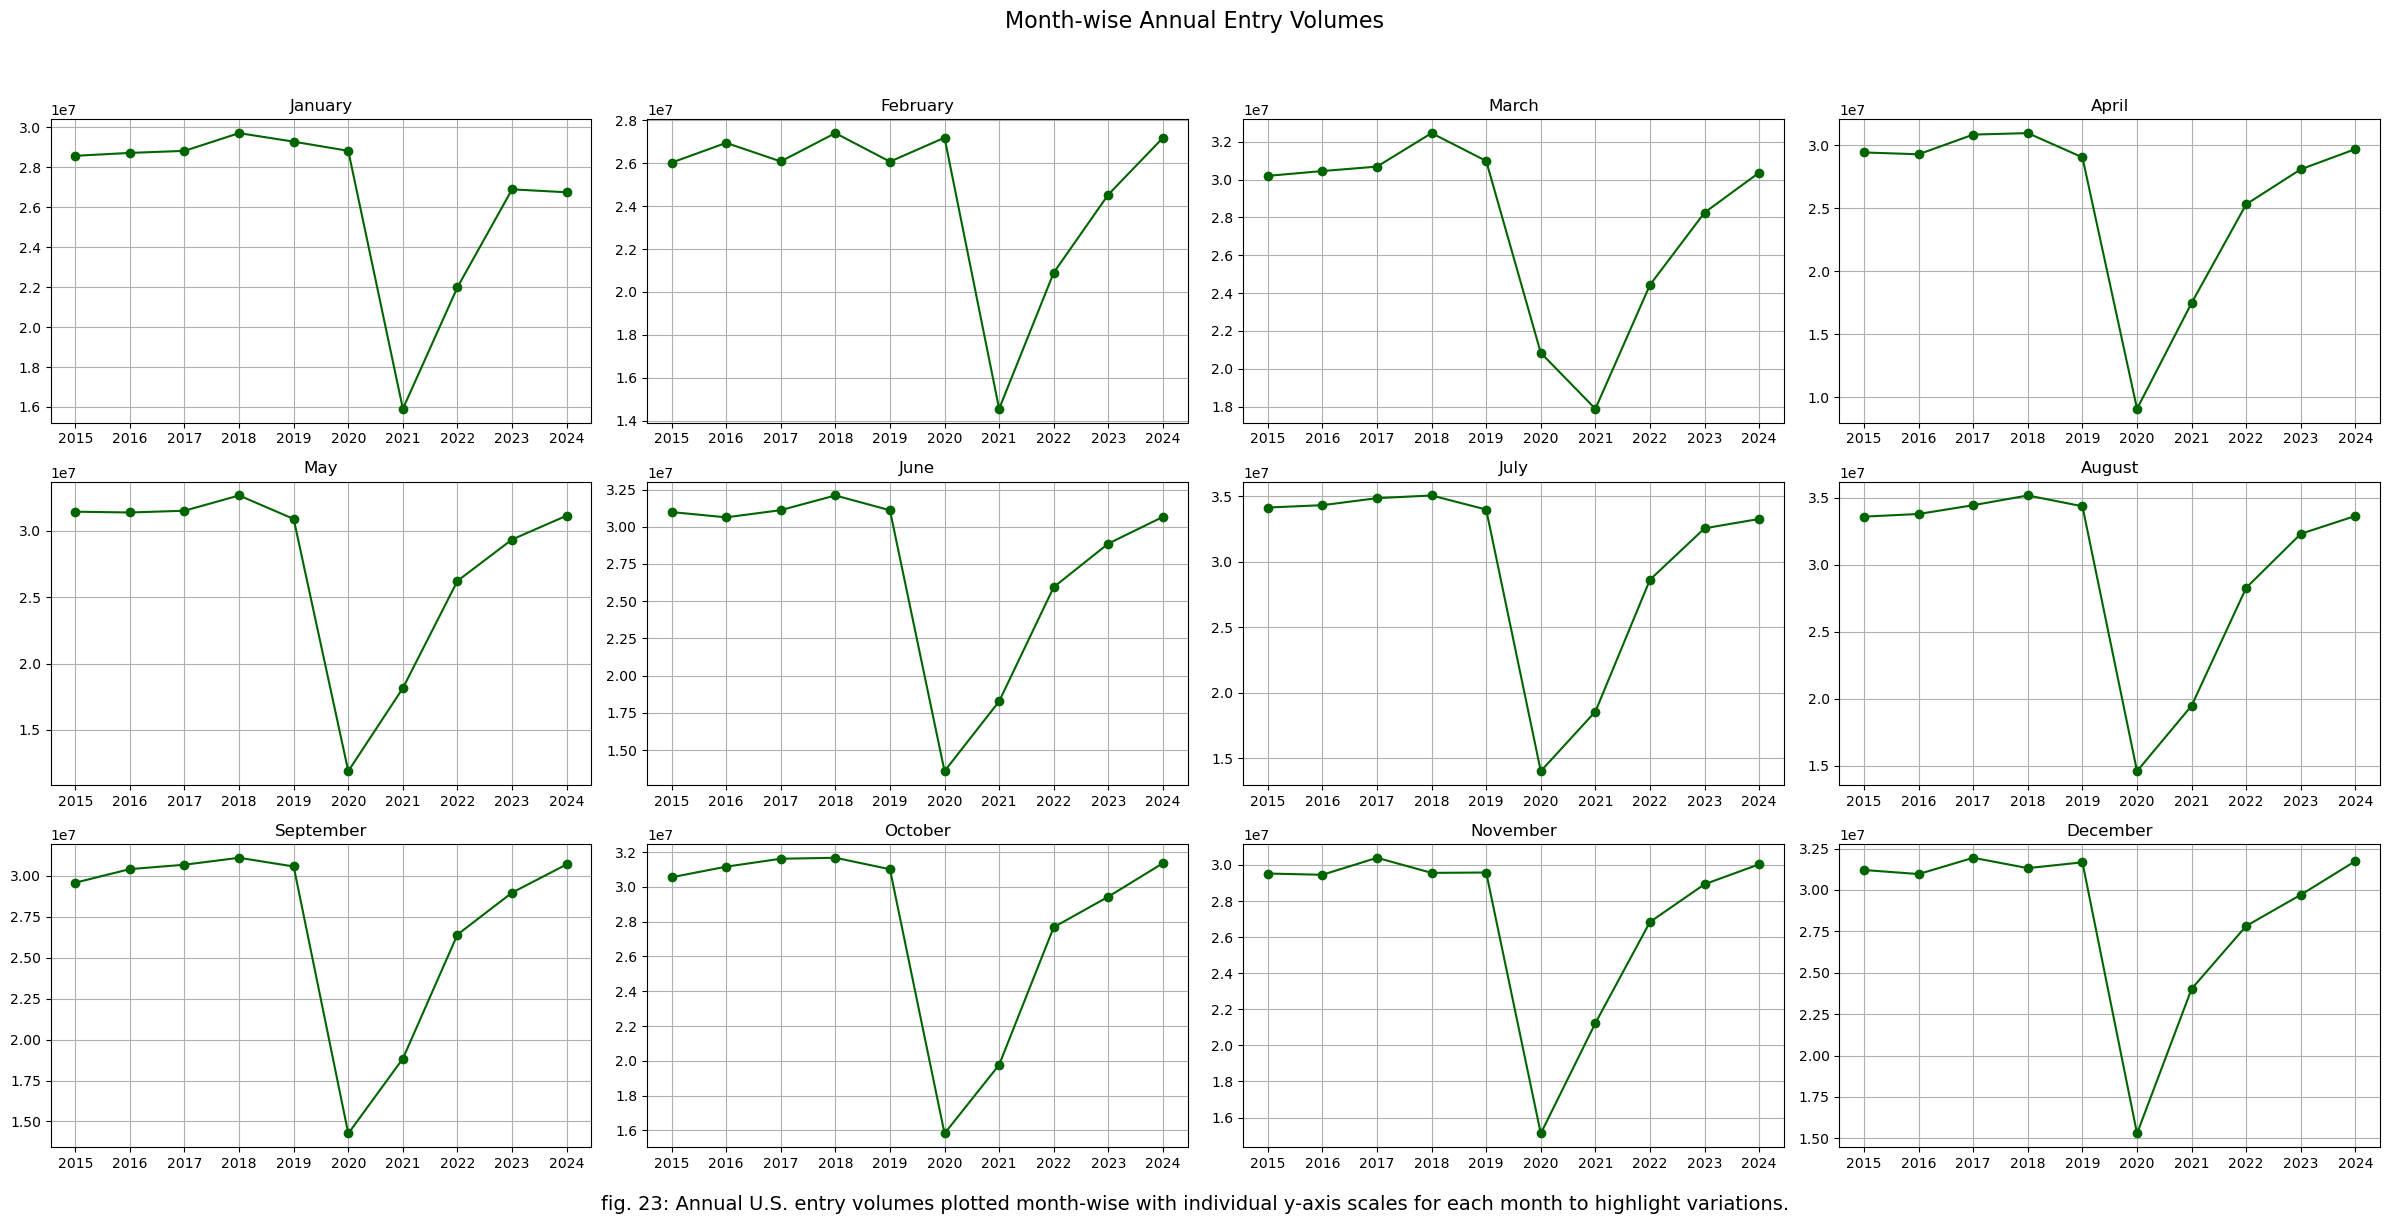

In [221]:

month_year_entry = finalized_broder_crossing_df.groupby(['Month', 'Year'])['Value'].sum().reset_index()
month_year_entry = month_year_entry.merge(month_table, left_on='Month', right_on='Month_Number', how='left')
month_year_entry = month_year_entry.drop(columns=['Month_x', 'Month_Number'])
month_year_entry = month_year_entry.rename(columns={'Month_y': 'Month'})
month_year_entry = month_year_entry[['Month', 'Year', 'Value']]

# Unique months
unique_months = month_year_entry['Month'].dropna().unique()
total_months = len(unique_months)

# Layout: 6 charts per row
cols = 4
rows = math.ceil(total_months / cols)

# Create subplots
fig, axes = plt.subplots(rows, cols, figsize=(6 * cols, 4 * rows), sharey=False)
axes = axes.flatten()

# Plot each month's data
for i, month in enumerate(unique_months):
    data = month_year_entry[month_year_entry['Month'] == month]
    axes[i].plot(data['Year'], data['Value'], marker='o', color='darkgreen')
    axes[i].set_title(str(month))
    axes[i].set_xlabel('')
    axes[i].xaxis.set_major_locator(MaxNLocator(integer=True))
    axes[i].tick_params(axis='x', rotation=0)
    axes[i].grid(True)
    if i % cols == 0:
        axes[i].set_ylabel('')

# Hide unused axes if any
for j in range(len(unique_months), len(axes)):
    fig.delaxes(axes[j])

# Add main title
plt.suptitle('Month-wise Annual Entry Volumes', fontsize=16)
plt.figtext(0.5, -0.02, 'fig. 23: Annual U.S. entry volumes plotted month-wise with individual y-axis scales for each month to highlight variations.', ha='center', fontsize=14, fontstyle='normal')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

<div style="background-color: #2A7AB8; padding: 10px;">
    <b>Entry Trends by Border Over Time</b>
</div>

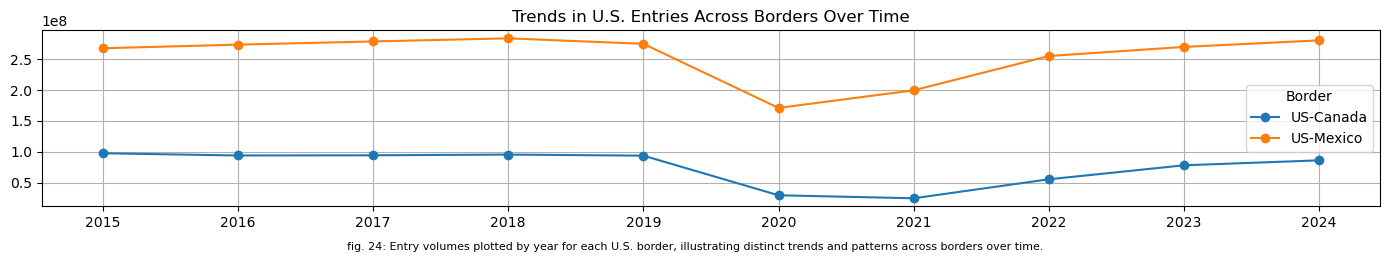

In [222]:

year_border_entry = finalized_broder_crossing_df.groupby(['Year', 'Border_Code'])['Value'].sum().reset_index()
year_border_entry = year_border_entry.merge(border_table[['Border', 'Border_Code']], on='Border_Code', how='left')

# Plot
plt.figure(figsize=(14, 2.5))

for border in year_border_entry['Border'].unique():
    data = year_border_entry[year_border_entry['Border'] == border]
    plt.plot(data['Year'], data['Value'], marker='o', label=border)

plt.title('Trends in U.S. Entries Across Borders Over Time')
plt.xlabel('')
plt.ylabel('')
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True)) 
plt.grid(True)
plt.legend(title='Border')
plt.figtext(0.5, -0.02, 'fig. 24: Entry volumes plotted by year for each U.S. border, illustrating distinct trends and patterns across borders over time.', ha='center', fontsize=8, fontstyle='normal')
plt.tight_layout()
plt.show()

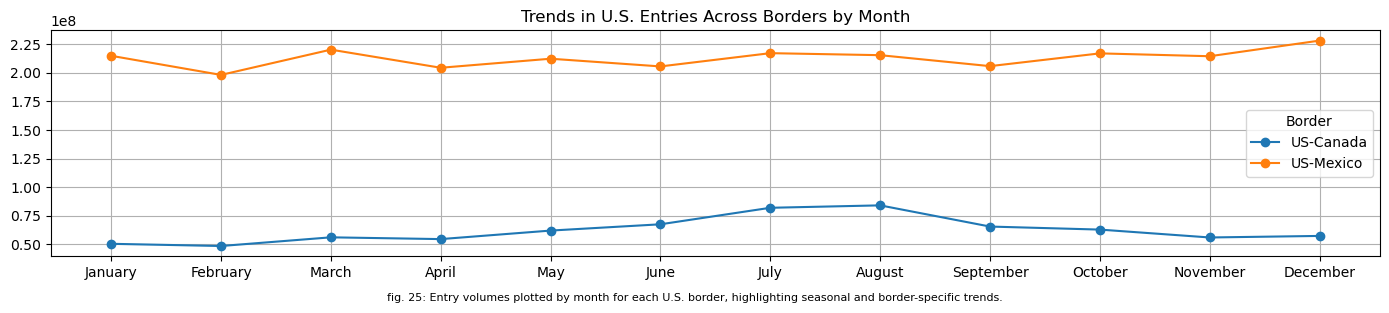

In [223]:

month_border_entry = finalized_broder_crossing_df.groupby(['Month', 'Border_Code'])['Value'].sum().reset_index()
month_border_entry = month_border_entry.merge(month_table, left_on='Month', right_on='Month_Number', how='left')
month_border_entry = month_border_entry.drop(columns=['Month_x', 'Month_Number'])
month_border_entry = month_border_entry.rename(columns={'Month_y': 'Month'})
month_border_entry = month_border_entry[['Border_Code', 'Month', 'Value']]
month_border_entry = month_border_entry.merge(border_table[['Border', 'Border_Code']], on='Border_Code', how='left')
# Plot
plt.figure(figsize=(14, 3))

for border in month_border_entry['Border'].unique():
    data = month_border_entry[month_border_entry['Border'] == border]
    plt.plot(data['Month'], data['Value'], marker='o', label=border)

plt.title('Trends in U.S. Entries Across Borders by Month')
plt.xlabel('')
plt.ylabel('')
plt.grid(True)
plt.legend(title='Border')
plt.figtext(0.5, -0.02, 'fig. 25: Entry volumes plotted by month for each U.S. border, highlighting seasonal and border-specific trends.', ha='center', fontsize=8, fontstyle='normal')
plt.tight_layout()
plt.show()

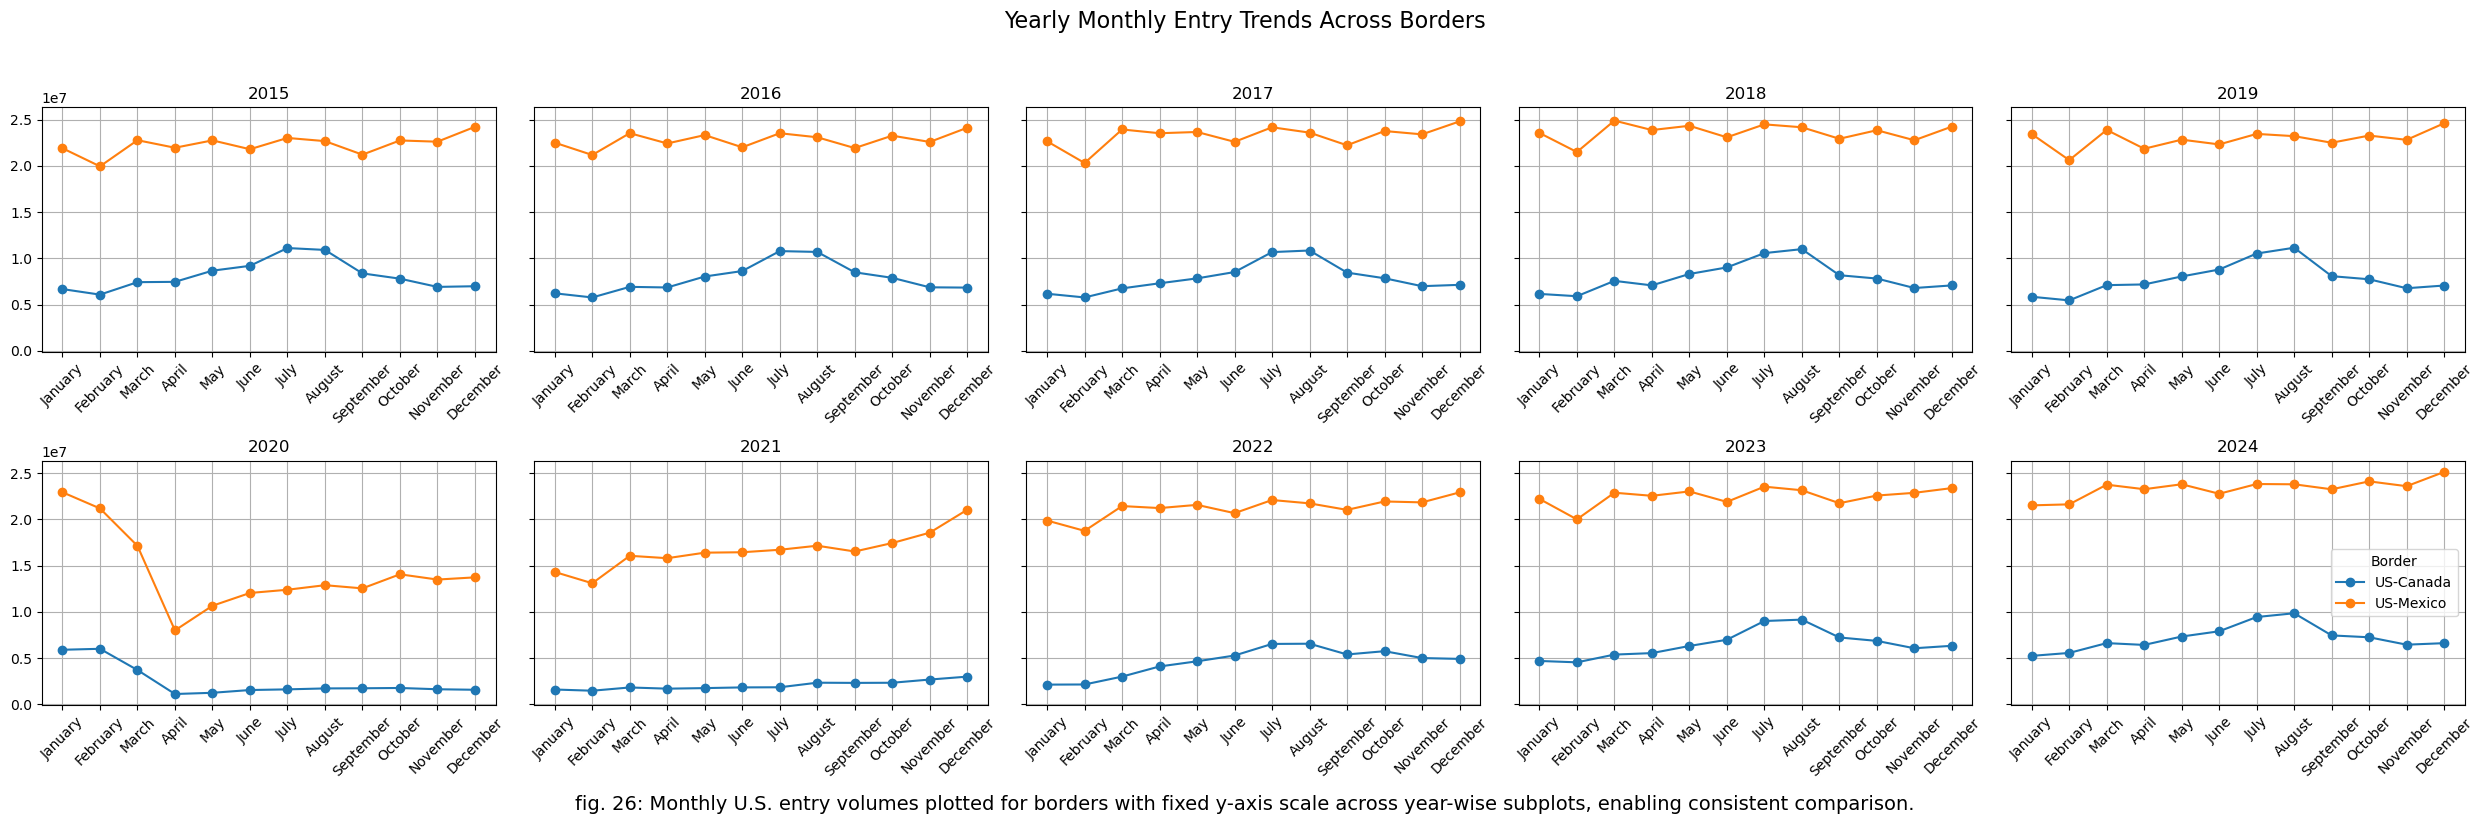

In [224]:

year_month_border_entry = finalized_broder_crossing_df.groupby(['Year', 'Month', 'Border_Code'])['Value'].sum().reset_index()
year_month_border_entry = year_month_border_entry.merge(month_table, left_on='Month', right_on='Month_Number', how='left')
year_month_border_entry = year_month_border_entry.drop(columns=['Month_x',])
year_month_border_entry = year_month_border_entry.rename(columns={'Month_y': 'Month'})
year_month_border_entry = year_month_border_entry[['Year', 'Border_Code', 'Month','Month_Number', 'Value']]
year_month_border_entry = year_month_border_entry.merge(border_table[['Border', 'Border_Code']], on='Border_Code', how='left')

# Get unique years
unique_years = sorted(year_month_border_entry['Year'].unique())
total_years = len(unique_years)

# Layout: 5 charts per row
cols = 5
rows = math.ceil(total_years / cols)

fig, axes = plt.subplots(rows, cols, figsize=(5 * cols, 4 * rows), sharey=True)
axes = axes.flatten()

# Plot per year
for i, year in enumerate(unique_years):
    ax = axes[i]
    data = year_month_border_entry[year_month_border_entry['Year'] == year]

    for border in data['Border'].unique():
        line_data = data[data['Border'] == border]
        ax.plot(line_data['Month'], line_data['Value'], marker='o', label=border)

    ax.set_title(str(year))
    ax.set_xticks(range(len(line_data['Month']))) #to avoid warnings
    '''That warning happens because set_xticklabels() was called without explicitly setting the tick locations first, 
    so matplotlib isn’t sure which ticks the labels correspond to.
    To fix this warning, you should first set the tick locations with set_xticks() and then set the tick labels.'''
    ax.set_xticklabels(line_data['Month'], rotation=45)
    ax.grid(True)

    if i % cols == 0:
        ax.set_ylabel('')
    ax.set_xlabel('')

# Hide extra axes
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Overall formatting
plt.suptitle('Yearly Monthly Entry Trends Across Borders', fontsize=16)
plt.figtext(0.5, -0.02, 'fig. 26: Monthly U.S. entry volumes plotted for borders with fixed y-axis scale across year-wise subplots, enabling consistent comparison.', ha='center', fontsize=14, fontstyle='normal')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.legend(title='Border', loc='center right')
plt.show()

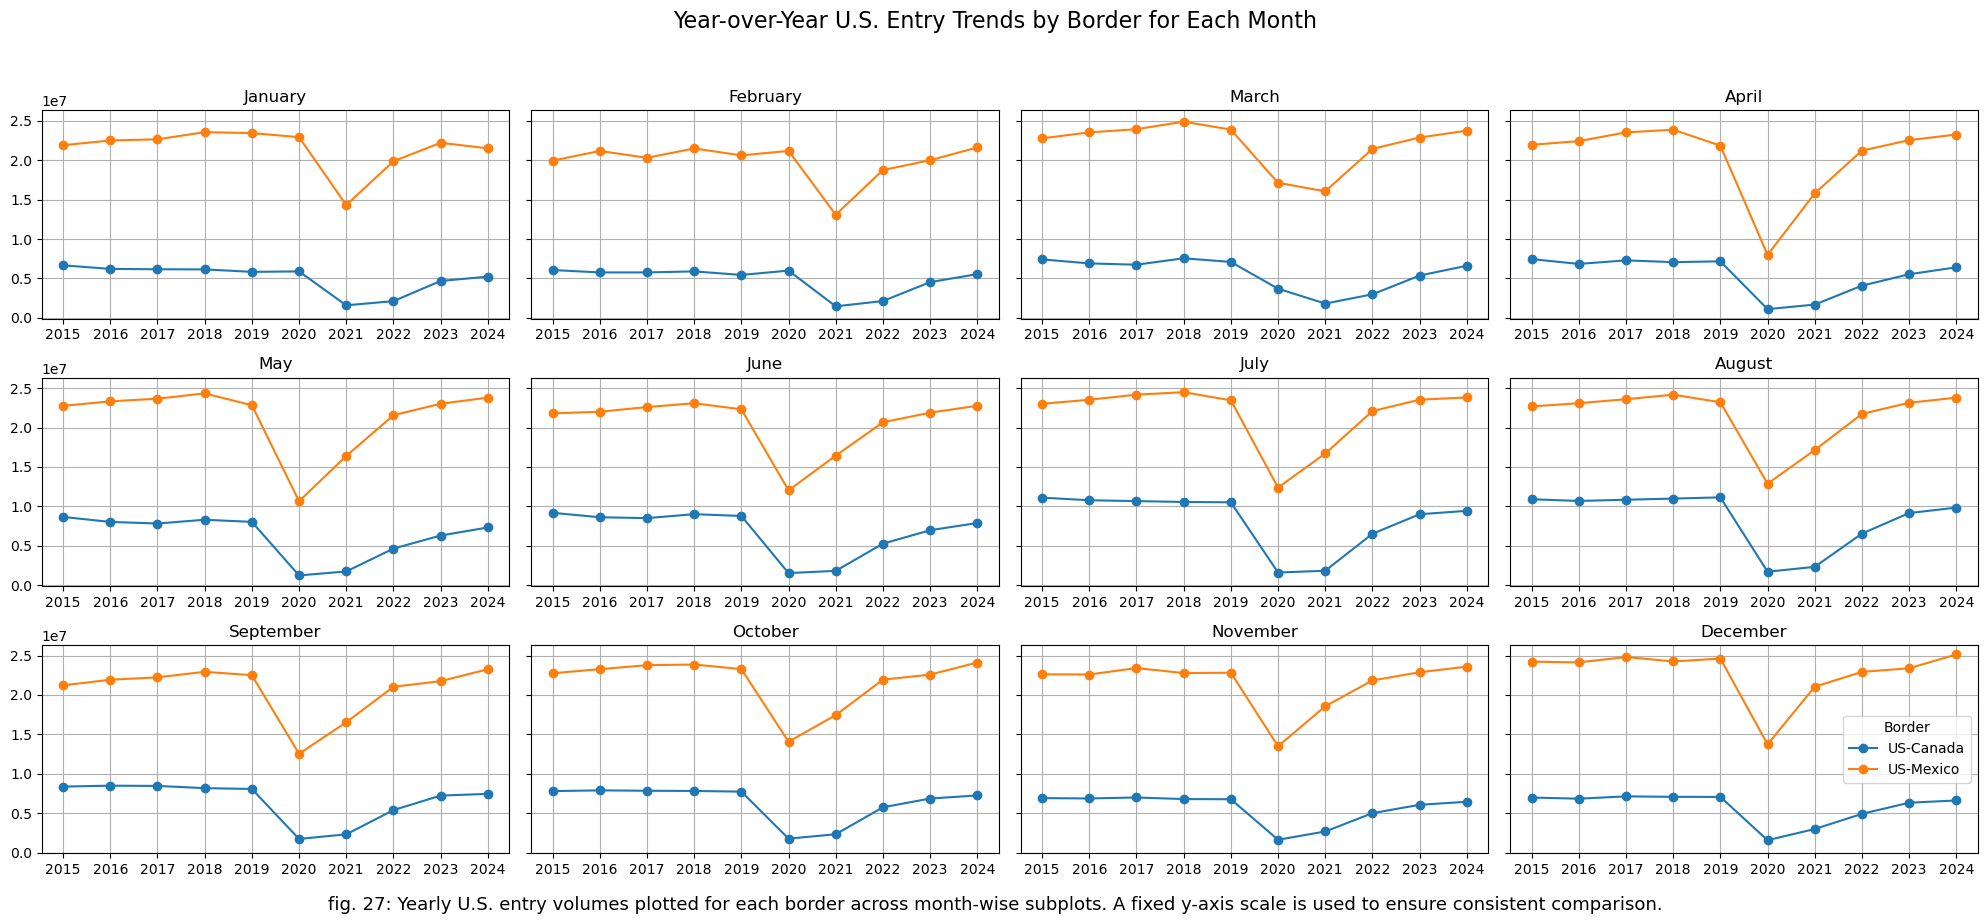

In [225]:
# Merge to get Month name
df = year_month_border_entry
'''.merge(
    month_table,
    left_on='Month',
    right_on='Month_Number',
    how='left'
)'''

# Plot setup: 5 charts per row
unique_months = sorted(df['Month_Number'].unique())
total_months = len(unique_months)
cols = 4
rows = math.ceil(total_months / cols)

fig, axes = plt.subplots(rows, cols, figsize=(5 * cols, 3 * rows), sharey=True)
axes = axes.flatten()

for i, month_num in enumerate(unique_months):
    ax = axes[i]
    month_data = df[df['Month_Number'] == month_num]

    for border in month_data['Border'].unique():
        border_data = month_data[month_data['Border'] == border]
        ax.plot(border_data['Year'], border_data['Value'], marker='o', label=border)

    month_name = month_table.loc[month_table['Month_Number'] == month_num, 'Month'].values[0]
    ax.set_title(month_name)
    ax.set_xlabel('')
    if i % cols == 0:
        ax.set_ylabel('')
    ax.grid(True)
    ax.xaxis.set_major_locator(MaxNLocator(integer=True)) 

# Remove empty subplots if any
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.suptitle('Year-over-Year U.S. Entry Trends by Border for Each Month', fontsize=16)
plt.figtext(0.5, -0.02, 'fig. 27: Yearly U.S. entry volumes plotted for each border across month-wise subplots. A fixed y-axis scale is used to ensure consistent comparison.', ha='center', fontsize=13, fontstyle='normal')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.legend(title='Border', loc='center right')
plt.show()

<div style="background-color: #2A7AB8; padding: 10px;">
    <b>Entry Trends by State Over Time</b>
</div>

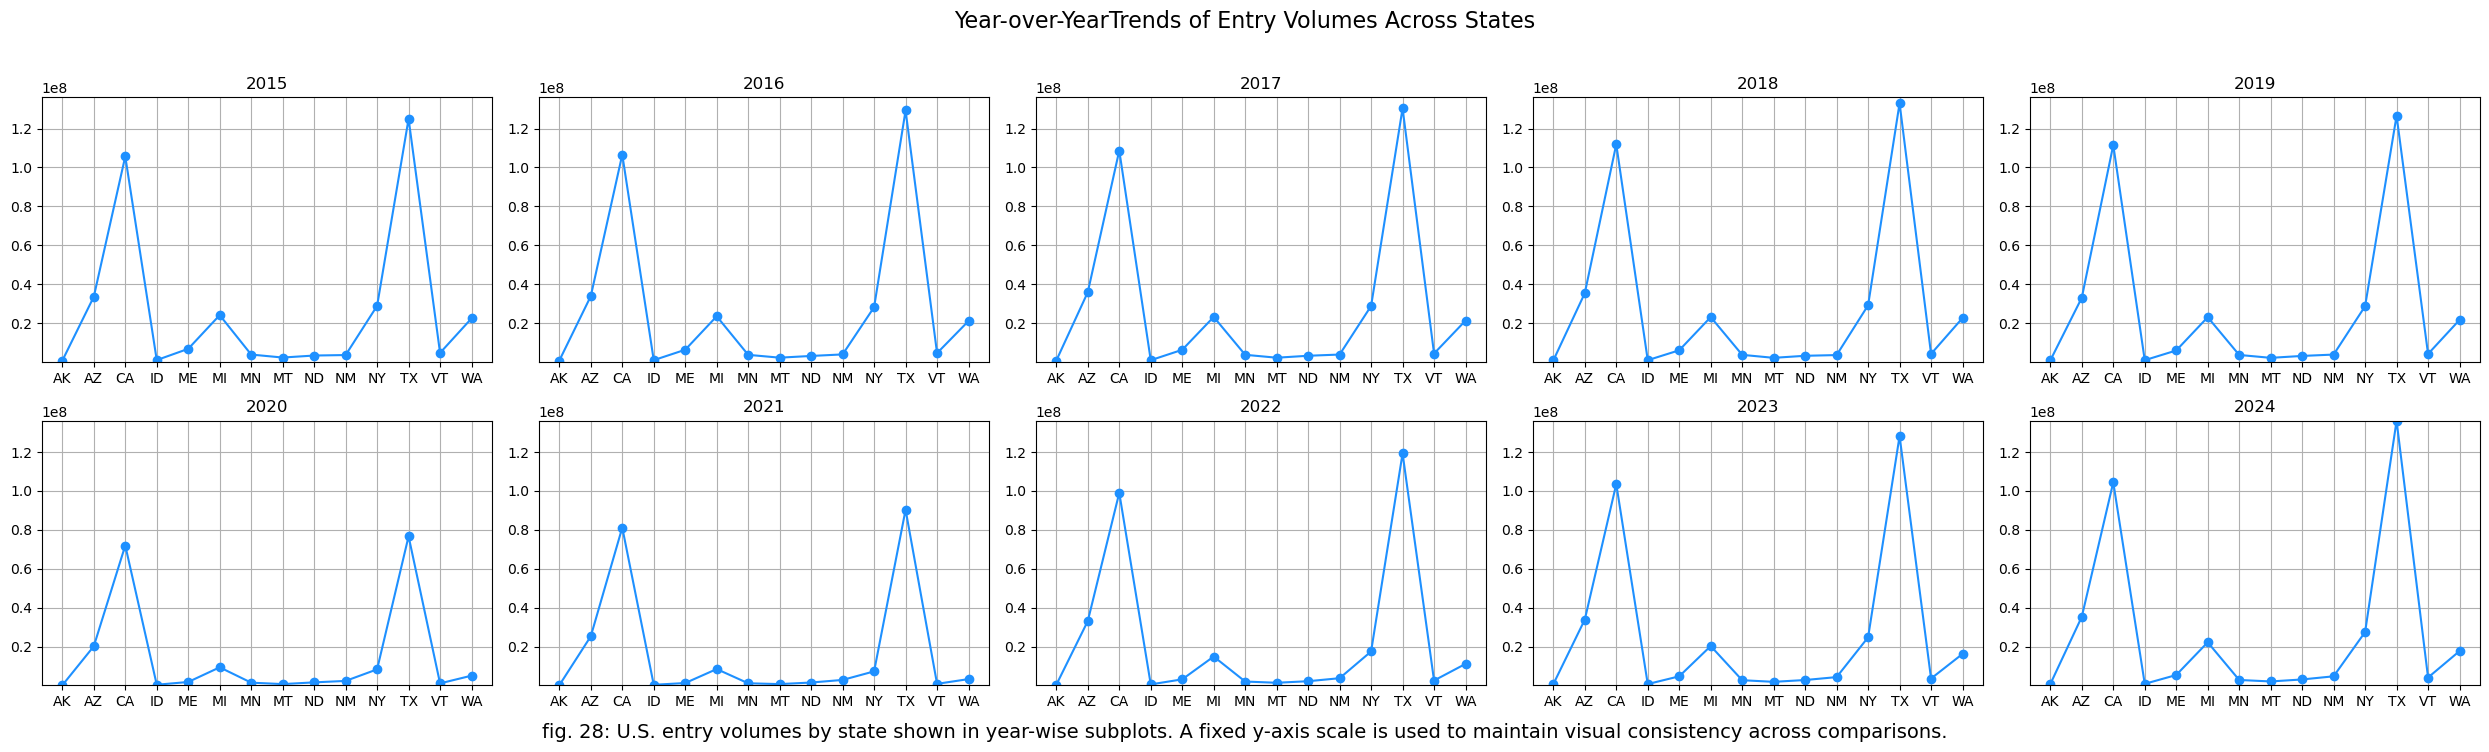

In [226]:

year_state_entry = finalized_broder_crossing_df.groupby(['Year', 'State_Code'])['Value'].sum().reset_index()

#Join to get abbreviations
merged_df = pd.merge(year_state_entry, state_table[['State_Code', 'Abbr']], on='State_Code')

#Unique years
years = sorted(merged_df['Year'].unique())
num_years = len(years)

#Grid layout: 5 charts per row
cols = 5
rows = math.ceil(num_years / cols)

#Fix y-axis limits globally
y_min = merged_df['Value'].min()
y_max = merged_df['Value'].max()

#Create subplots
fig, axes = plt.subplots(rows, cols, figsize=(cols*5, rows*3.5), squeeze=False)

plt.suptitle('Year-over-YearTrends of Entry Volumes Across States', fontsize=16, y=1.02)

for idx, year in enumerate(years):
    row = idx // cols
    col = idx % cols
    ax = axes[row][col]

    data = merged_df[merged_df['Year'] == year].sort_values('Abbr')

    ax.plot(data['Abbr'], data['Value'], marker='o', linestyle='-', color='dodgerblue')
    ax.set_title(f'{year}')
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.set_ylim(y_min, y_max)  #Fix the y-axis
    ax.grid(True)

#Remove any extra empty subplots
total_plots = rows * cols
for i in range(num_years, total_plots):
    fig.delaxes(axes.flatten()[i])

plt.figtext(0.5, -0.02, 'fig. 28: U.S. entry volumes by state shown in year-wise subplots. A fixed y-axis scale is used to maintain visual consistency across comparisons.', ha='center', fontsize=14, fontstyle='normal')
plt.tight_layout()
plt.show()

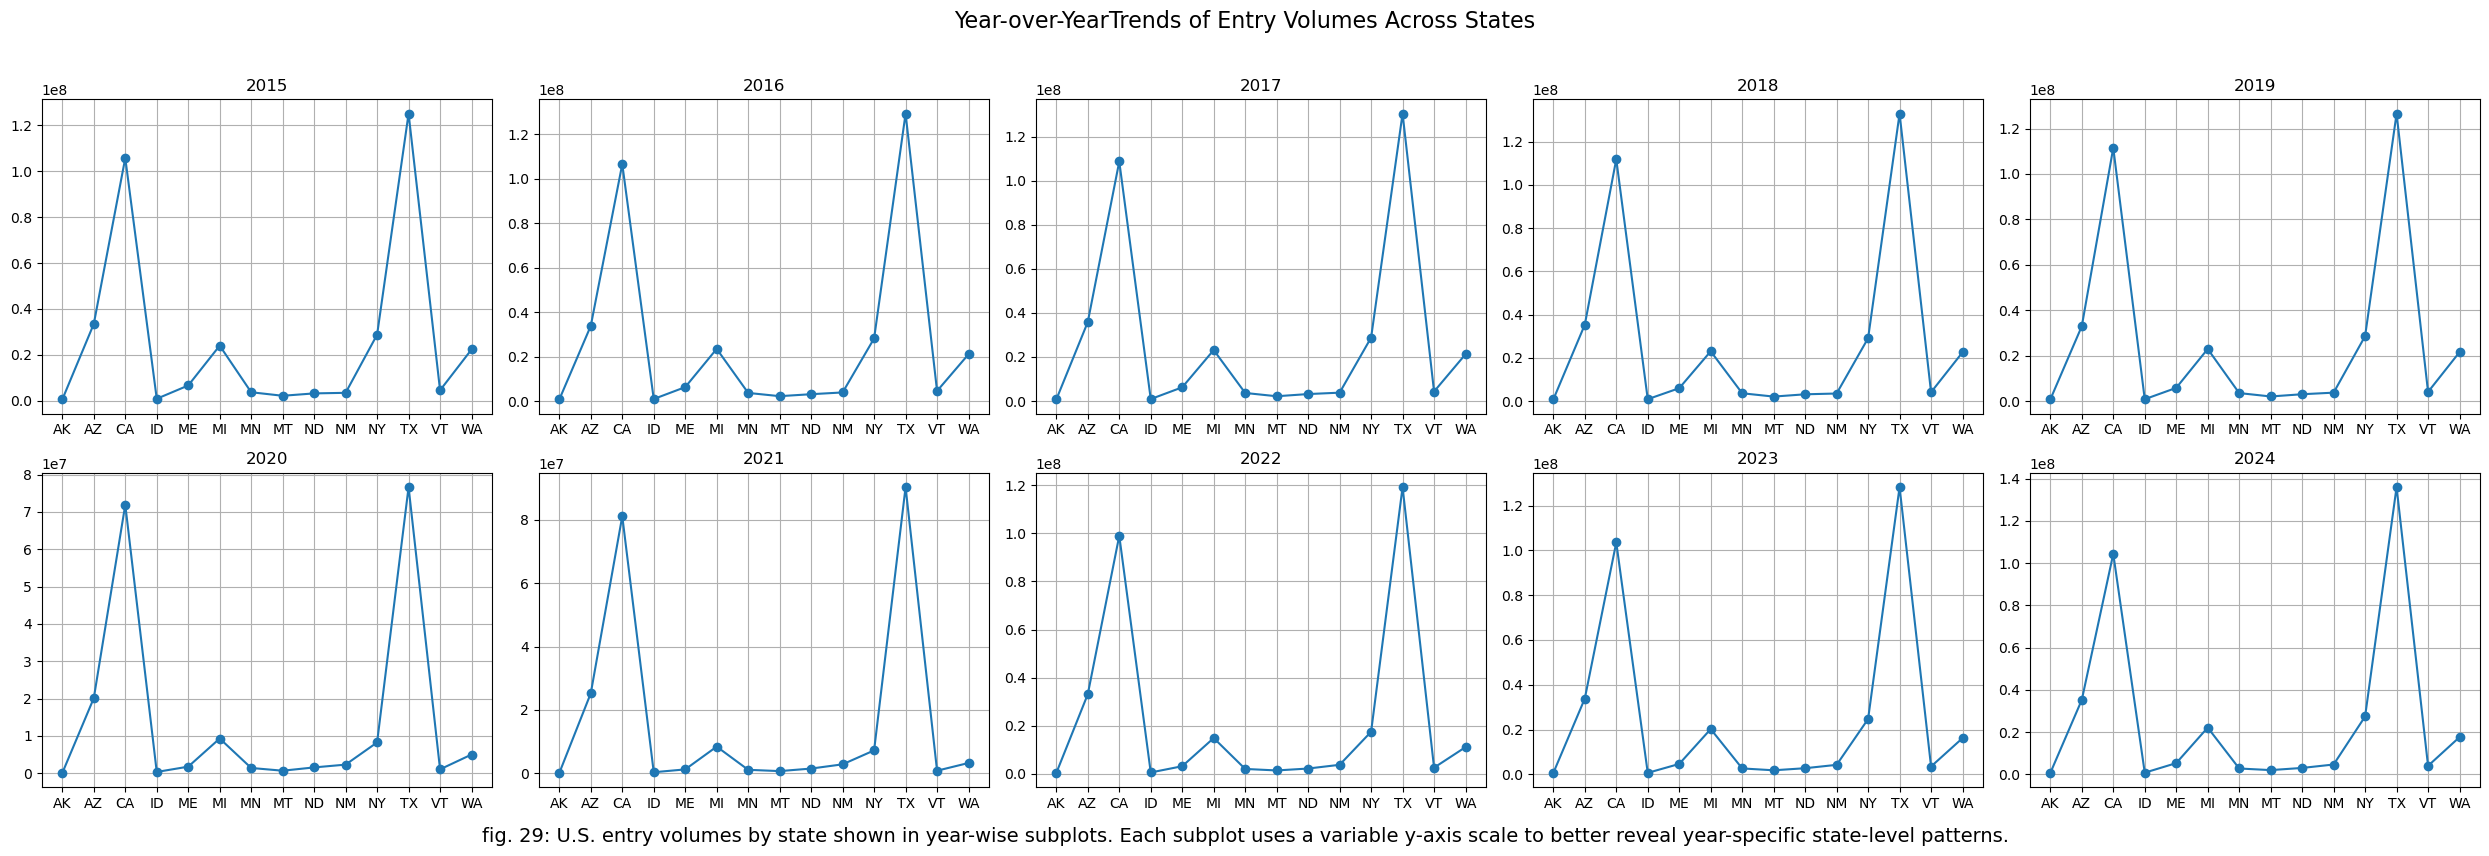

In [227]:

# Merge to get state abbreviations
merged_df = pd.merge(year_state_entry, state_table[['State_Code', 'Abbr']], on='State_Code')

# Get unique years and count for subplot arrangement
years = sorted(merged_df['Year'].unique())
num_years = len(years)
cols = 5
rows = math.ceil(num_years / cols)

fig, axes = plt.subplots(rows, cols, figsize=(cols*5, rows*4), squeeze=False)

plt.suptitle('Year-over-YearTrends of Entry Volumes Across States', fontsize=16, y=1.02)

for idx, year in enumerate(years):
    row = idx // cols
    col = idx % cols
    ax = axes[row][col]
    
    data = merged_df[merged_df['Year'] == year]
    # Sort by state abbreviation for consistent x-axis order
    data = data.sort_values('Abbr')
    
    ax.plot(data['Abbr'], data['Value'], marker='o')
    ax.set_title(f'{year}')
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.grid(True)

# Remove unused subplots
total_plots = rows * cols
for i in range(num_years, total_plots):
    fig.delaxes(axes.flatten()[i])

plt.figtext(0.5, -0.02, 'fig. 29: U.S. entry volumes by state shown in year-wise subplots. Each subplot uses a variable y-axis scale to better reveal year-specific state-level patterns.', ha='center', fontsize=14, fontstyle='normal')
plt.tight_layout()
plt.show()

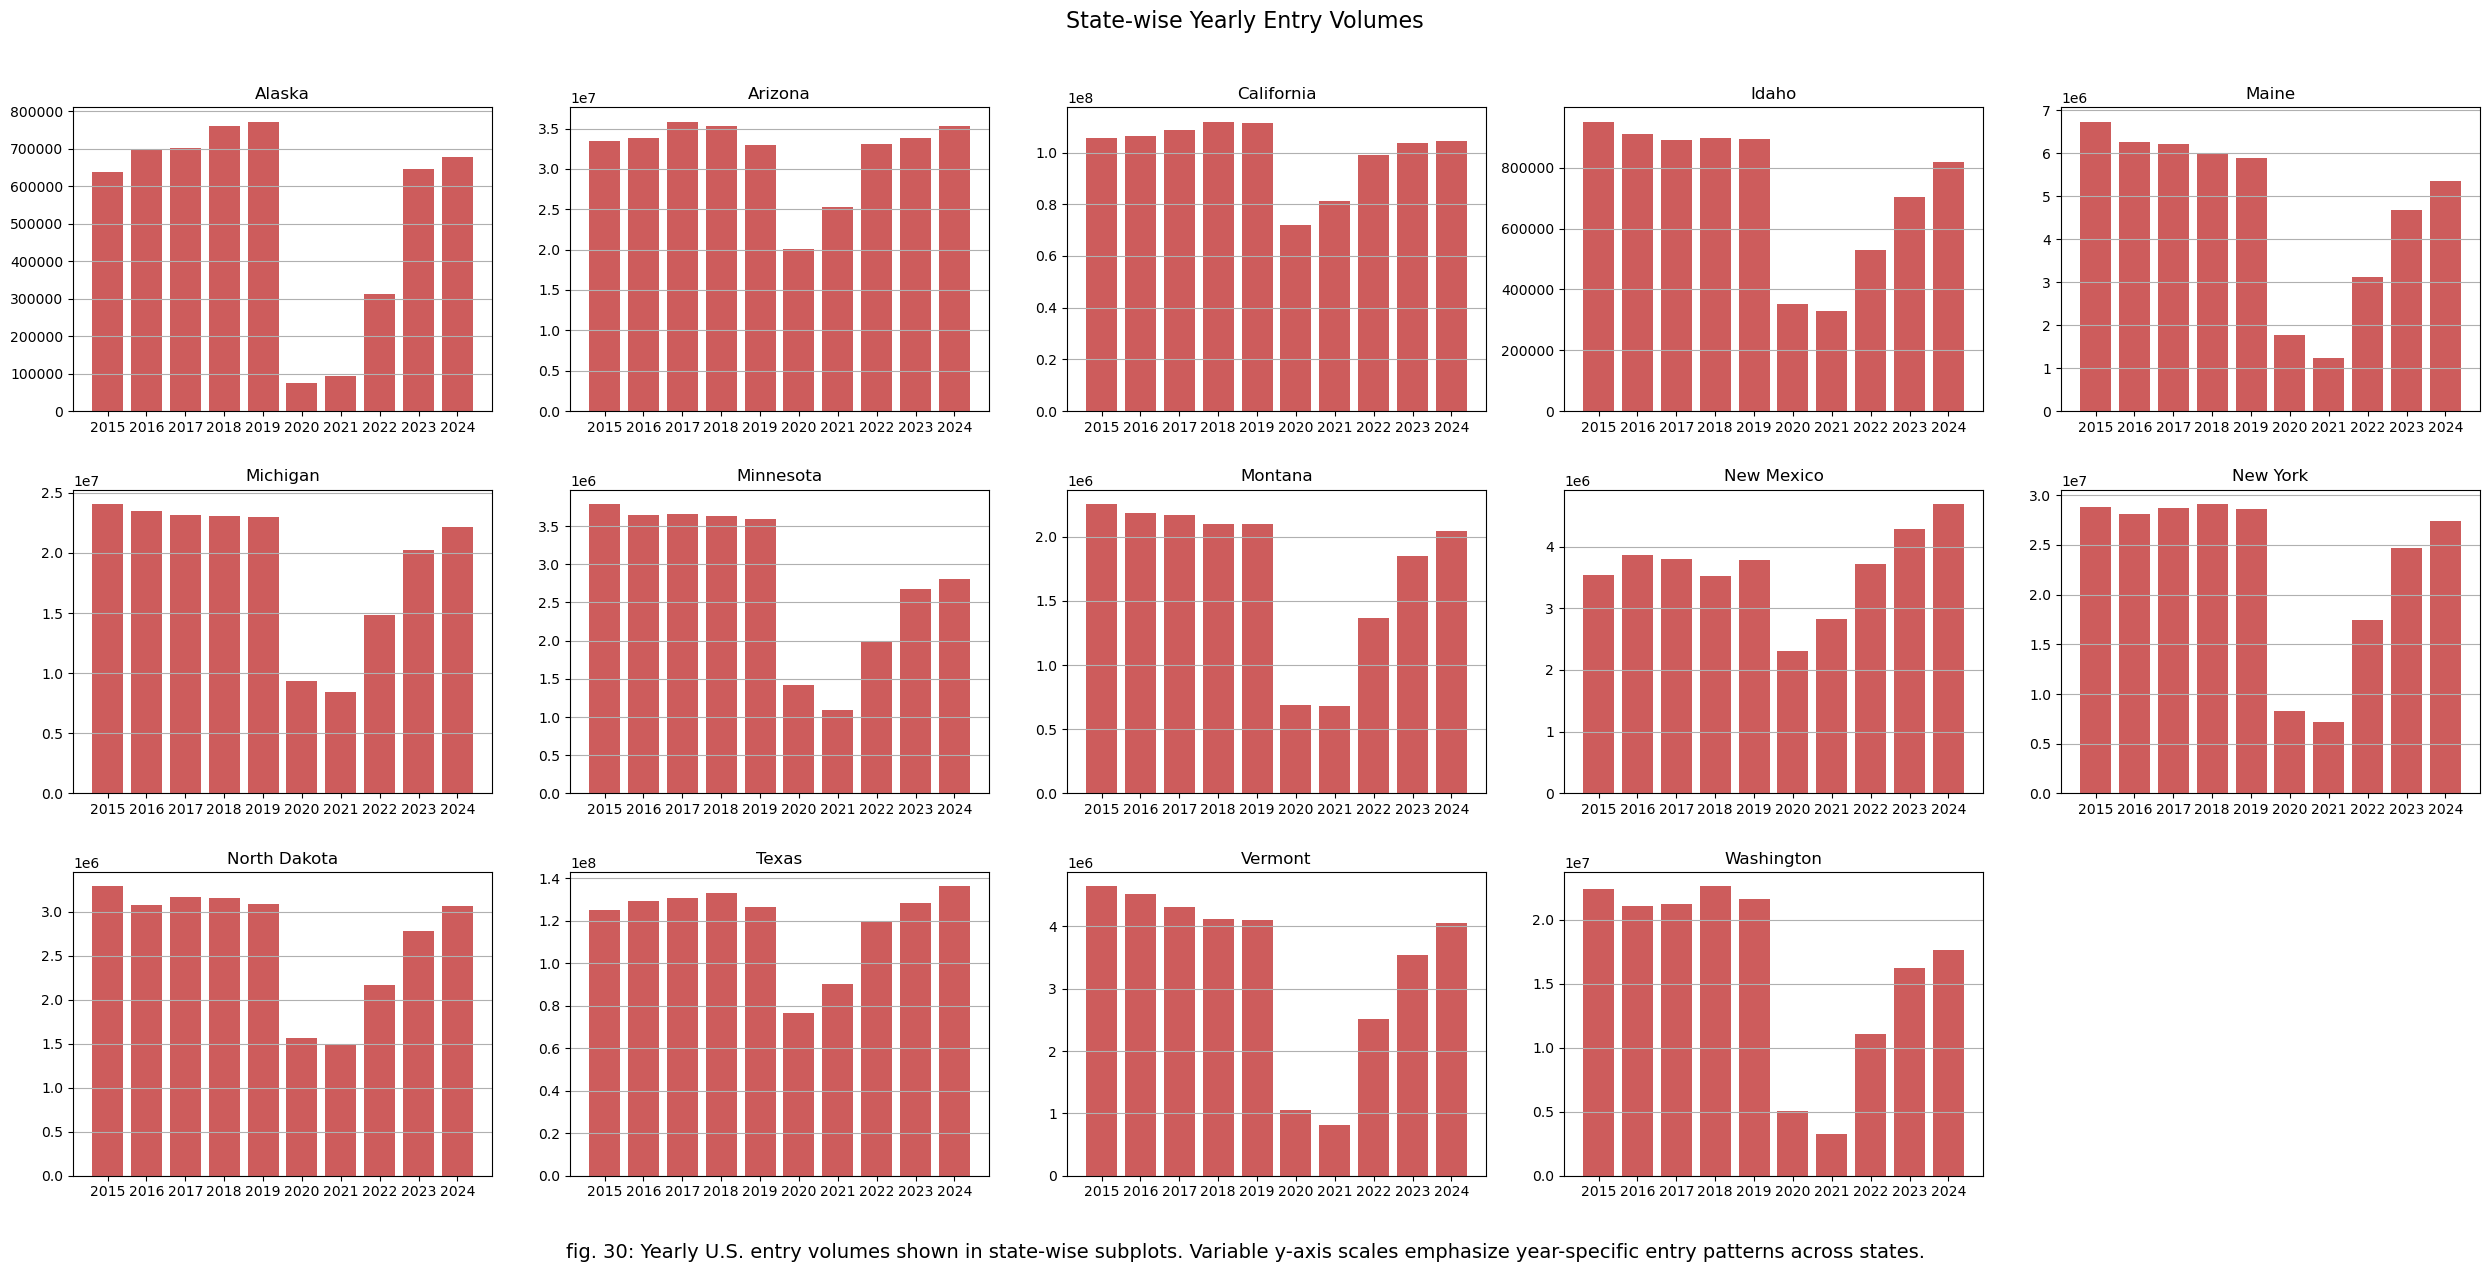

In [228]:
# Merge to get state abbreviations
merged_df = pd.merge(year_state_entry, state_table[['State_Code', 'State']], on='State_Code')

# Get unique states for subplotting
states = sorted(merged_df['State'].unique())
num_states = len(states)
cols = 5
rows = math.ceil(num_states / cols)

fig, axes = plt.subplots(rows, cols, figsize=(cols*5, rows*4), squeeze=False)

plt.suptitle('State-wise Yearly Entry Volumes', fontsize=16, y=1.02)

for idx, state in enumerate(states):
    row = idx // cols
    col = idx % cols
    ax = axes[row][col]
    
    data = merged_df[merged_df['State'] == state].sort_values('Year')
    
    ax.bar(data['Year'].astype(str), data['Value'], color='indianred')
    ax.set_title(f'{state}')
    ax.set_xlabel(' ')
    ax.set_ylabel('')
    ax.grid(axis='y')

# Remove empty subplots if any
total_plots = rows * cols
for i in range(num_states, total_plots):
    fig.delaxes(axes.flatten()[i])

plt.figtext(0.5, -0.02, 'fig. 30: Yearly U.S. entry volumes shown in state-wise subplots. Variable y-axis scales emphasize year-specific entry patterns across states.', ha='center', fontsize=14, fontstyle='normal')
plt.tight_layout()
plt.show()

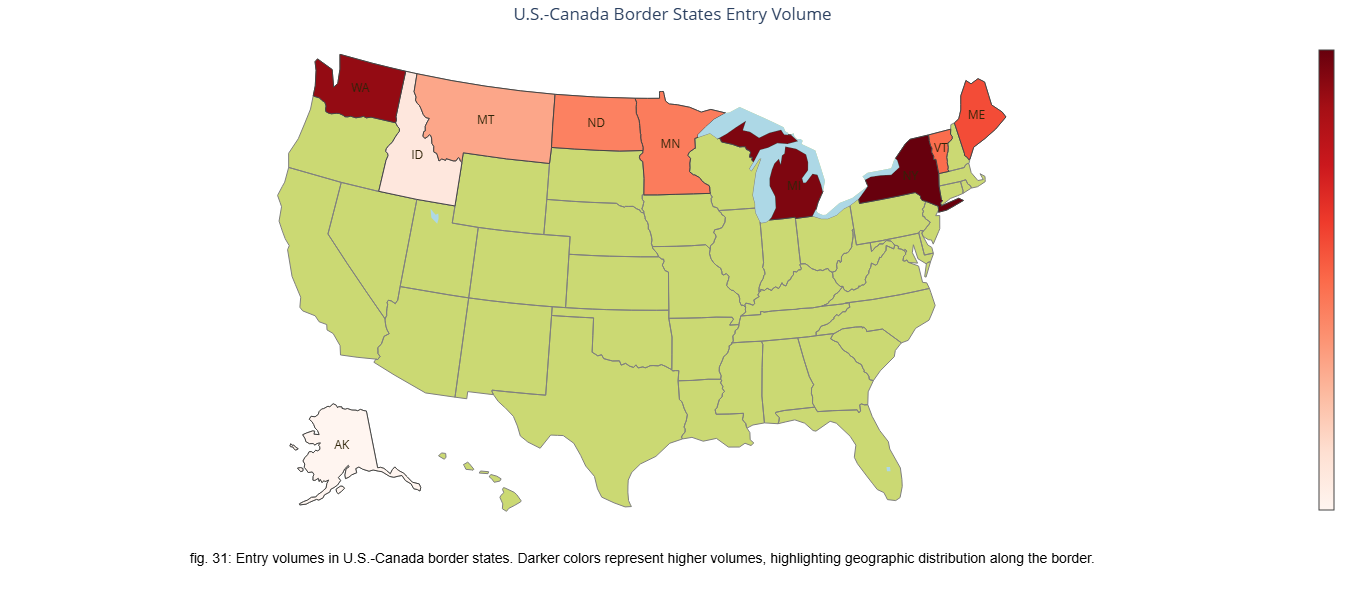

In [229]:

# Merge finalized_broder_crossing_df with state_table to get the State name
finalized_df = finalized_broder_crossing_df \
    .merge(state_table[['Abbr', 'State', 'State_Code']], on='State_Code', how='left')

# Group by State and sum the Value
state_totals = finalized_df.groupby(['Border_Code', 'State'])['Value'].sum().reset_index()

state_totals = state_totals[state_totals['Border_Code'] == 1]

# Apply log transformation to 'Value' column
state_totals['Log_Value'] = np.log(state_totals['Value'] + 1)  # Adding 1 to avoid log(0)

# Create a function to format large values
def format_value(value):
    if value >= 1_000_000:
        return f"{value/1_000_000:.1f} M"
    elif value >= 1_000:
        return f"{value/1_000:.1f} K"
    else:
        return str(value)

# Apply the formatting function to the 'Value' column
state_totals['Formatted_Value'] = state_totals['Value'].apply(format_value)

# Create the formatted "Entry" string with both raw and formatted values
state_totals['Entry'] = state_totals.apply(
    lambda row: f"{row['Value']:,} ({row['Formatted_Value']})", axis=1
)

# Join state_totals with state_table to get State Code for plotting
state_totals = state_totals.merge(state_table[['Abbr', 'State', 'State_Code']], on='State', how='left')

# Set up the Choropleth map using Plotly
fig = px.choropleth(
    state_totals,
    locations="Abbr",  # Use State_Code to match on the map
    locationmode="USA-states",  # USA states mapping
    color="Log_Value",  # Color based on total value (log)
    color_continuous_scale="Reds",  # Color scale
    scope="usa",  # Only show USA
    title="U.S.-Canada Border States Entry Volume ",
    hover_data={
        "State": True,  # Show State
        "Entry": True,
        "Formatted_Value": False,  # Show formatted value with K/M suffix
        "State_Code": False,  # Hide State Code
        "Log_Value": False,
        "Abbr": False
    }
)

# Add state abbreviations using scattergeo for text annotations
fig.add_trace(go.Scattergeo(
    locations=state_totals['Abbr'],
    locationmode="USA-states",
    text=state_totals['Abbr'],
    mode='text',
    textfont=dict(size=12, color="#302509"),
    hoverinfo='none' 
))
# Adjust layout for fitting the map nicely
fig.update_layout(
    geo=dict(
        showland=True,
        landcolor="#CBD973",  # Color for the land
        subunitcolor="gray",  # Color for subunits (state borders)
        showlakes=True,
        lakecolor="lightblue"
    ),
    margin={"r":0,"t":40,"l":0,"b":80},  # Adjust margins to fit better
    autosize=True,
    height=600,  # Set a comfortable height for the map
    width=1350,  # Set a comfortable width for the map
    title_x=0.5,  # Center title
    coloraxis_showscale=True,  # Hide the color scale itself
           coloraxis_colorbar=dict(
        title="",
        ticks="outside",
        tickvals=[0, 0.5, 1],
        ticktext=["Low", "Medium", "High"],
        len=1,  # length of colorbar
        thickness=15,
        outlinewidth=1,
        bgcolor='white'
           )
)

fig.add_annotation(
    text="fig. 31: Entry volumes in U.S.-Canada border states. Darker colors represent higher volumes, highlighting geographic distribution along the border.",
    x=0.5,
    y=-0.1,  # bottom of the figure
    xref="paper",
    yref="paper",
    showarrow=False,
    font=dict(size=14, color='black', family='Arial'),
    xanchor='center',
    yanchor='bottom'
)

# Show the map
fig.show()

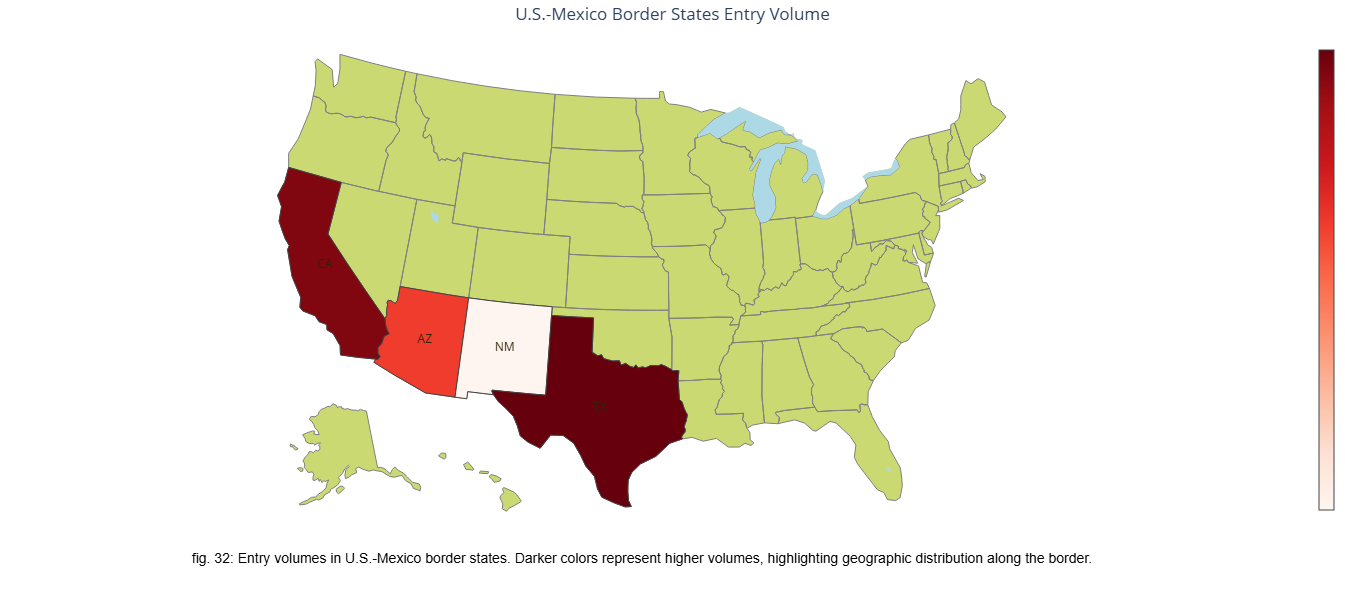

In [230]:

# Merge finalized_broder_crossing_df with state_table to get the State name
finalized_df = finalized_broder_crossing_df \
    .merge(state_table[['Abbr', 'State', 'State_Code']], on='State_Code', how='left')

# Group by State and sum the Value
state_totals = finalized_df.groupby(['Border_Code', 'State'])['Value'].sum().reset_index()

state_totals = state_totals[state_totals['Border_Code'] == 2]

# Apply log transformation to 'Value' column
state_totals['Log_Value'] = np.log(state_totals['Value'] + 1)  # Adding 1 to avoid log(0)

# Create a function to format large values
def format_value(value):
    if value >= 1_000_000:
        return f"{value/1_000_000:.1f} M"
    elif value >= 1_000:
        return f"{value/1_000:.1f} K"
    else:
        return str(value)

# Apply the formatting function to the 'Value' column
state_totals['Formatted_Value'] = state_totals['Value'].apply(format_value)

# Create the formatted "Entry" string with both raw and formatted values
state_totals['Entry'] = state_totals.apply(
    lambda row: f"{row['Value']:,} ({row['Formatted_Value']})", axis=1
)

# Join state_totals with state_table to get State Code for plotting
state_totals = state_totals.merge(state_table[['Abbr', 'State', 'State_Code']], on='State', how='left')

# Set up the Choropleth map using Plotly
fig = px.choropleth(
    state_totals,
    locations="Abbr",  # Use State_Code to match on the map
    locationmode="USA-states",  # USA states mapping
    color="Log_Value",  # Color based on total value (log)
    color_continuous_scale="Reds",  # Color scale
    scope="usa",  # Only show USA
    title="U.S.-Mexico Border States Entry Volume ",
    hover_data={
        "State": True,  # Show State
        "Entry": True,
        "Formatted_Value": False,  # Show formatted value with K/M suffix
        "State_Code": False,  # Hide State Code
        "Log_Value": False,
        "Abbr": False
    }
)

# Add state abbreviations using scattergeo for text annotations
fig.add_trace(go.Scattergeo(
    locations=state_totals['Abbr'],
    locationmode="USA-states",
    text=state_totals['Abbr'],
    mode='text',
    textfont=dict(size=12, color="#302509"),
    hoverinfo='none' 
))
# Adjust layout for fitting the map nicely
fig.update_layout(
    geo=dict(
        showland=True,
        landcolor="#CBD973",  # Color for the land
        subunitcolor="gray",  # Color for subunits (state borders)
        showlakes=True,
        lakecolor="lightblue"
    ),
    margin={"r":0,"t":40,"l":0,"b":80},  # Adjust margins to fit better
    autosize=True,
    height=600,  # Set a comfortable height for the map
    width=1350,  # Set a comfortable width for the map
    title_x=0.5,  # Center title
    coloraxis_showscale=True,  # Hide the color scale itself
           coloraxis_colorbar=dict(
        title="",
        ticks="outside",
        tickvals=[0, 0.5, 1],
        ticktext=["Low", "Medium", "High"],
        len=1,  # length of colorbar
        thickness=15,
        outlinewidth=1,
        bgcolor='white'
           )
)

fig.add_annotation(
    text="fig. 32: Entry volumes in U.S.-Mexico border states. Darker colors represent higher volumes, highlighting geographic distribution along the border.",
    x=0.5,
    y=-0.1,  # bottom of the figure
    xref="paper",
    yref="paper",
    showarrow=False,
    font=dict(size=14, color='black', family='Arial'),
    xanchor='center',
    yanchor='bottom'
)

# Show the map
fig.show()

<div style="background-color: #2A7AB8; padding: 10px;">
    <b>Entry Trends by Mode of Transport</b>
</div>

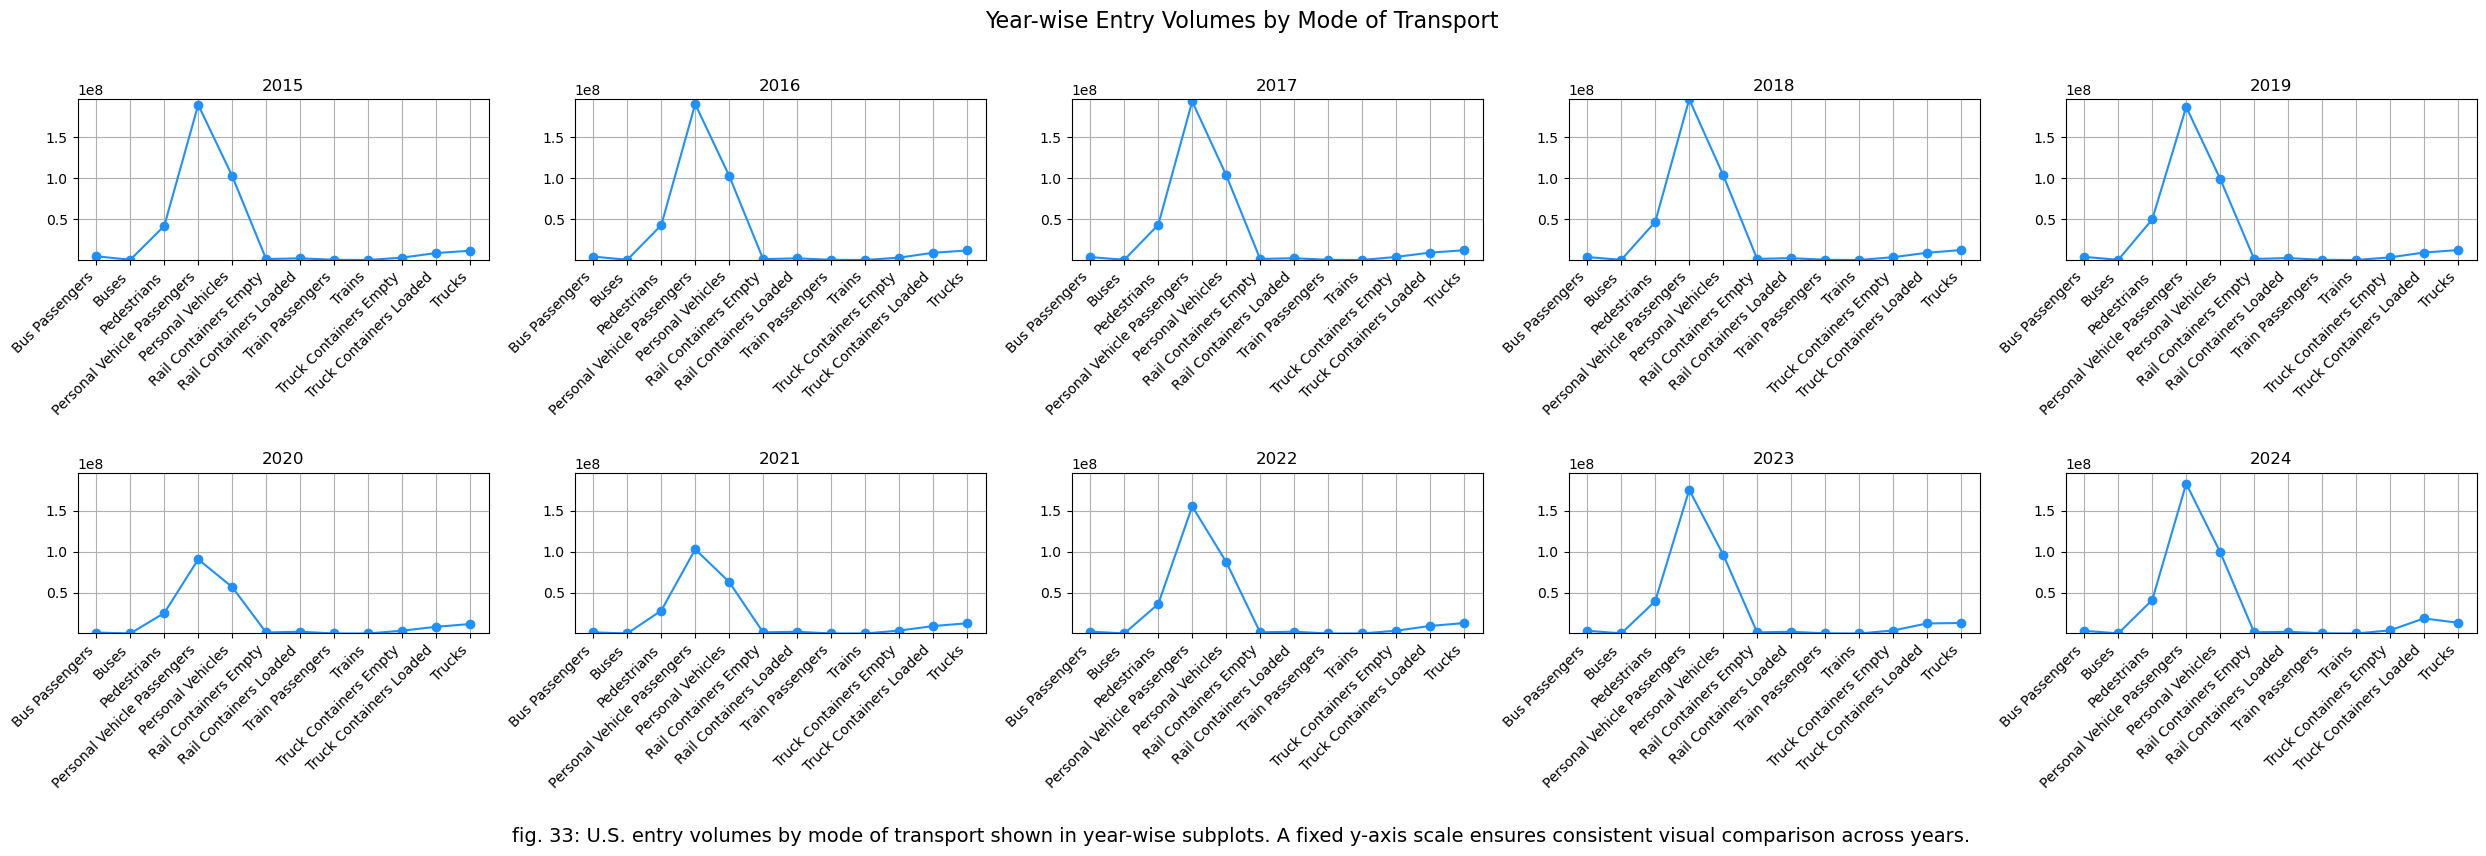

In [231]:
#fixed y-axis scale

year_measure_entry = finalized_broder_crossing_df.groupby(['Year', 'Measure_Code'])['Value'].sum().reset_index()
# Merge to get measure names
merged_df = pd.merge(year_measure_entry, measure_table, on='Measure_Code')

# Unique years
years = sorted(merged_df['Year'].unique())
num_years = len(years)

# Grid layout: 5 charts per row
cols = 5
rows = math.ceil(num_years / cols)

# Fix y-axis limits globally
y_min = merged_df['Value'].min()
y_max = merged_df['Value'].max()

# Create subplots
fig, axes = plt.subplots(rows, cols, figsize=(cols*5, rows*4), squeeze=False)

plt.suptitle('Year-wise Entry Volumes by Mode of Transport', fontsize=16, y=1.02)

for idx, year in enumerate(years):
    row = idx // cols
    col = idx % cols
    ax = axes[row][col]

    # Filter and sort data by measure name for consistent x-axis order
    data = merged_df[merged_df['Year'] == year].sort_values('Measure')

    ax.plot(data['Measure'], data['Value'], marker='o', linestyle='-', color='dodgerblue')
    ax.set_title(f'{year}')
    ax.set_xlabel(' ')
    ax.set_ylabel('')
    ax.set_ylim(y_min, y_max)  # Fix the y-axis limits across all charts
    ax.grid(True)

    # Rotate x-axis labels for better readability
    plt.setp(ax.get_xticklabels(), rotation=45, ha='right')

# Remove any extra empty subplots
total_plots = rows * cols
for i in range(num_years, total_plots):
    fig.delaxes(axes.flatten()[i])

plt.figtext(0.5, -0.02, 'fig. 33: U.S. entry volumes by mode of transport shown in year-wise subplots. A fixed y-axis scale ensures consistent visual comparison across years.', ha='center', fontsize=14, fontstyle='normal')
plt.tight_layout()
plt.show()

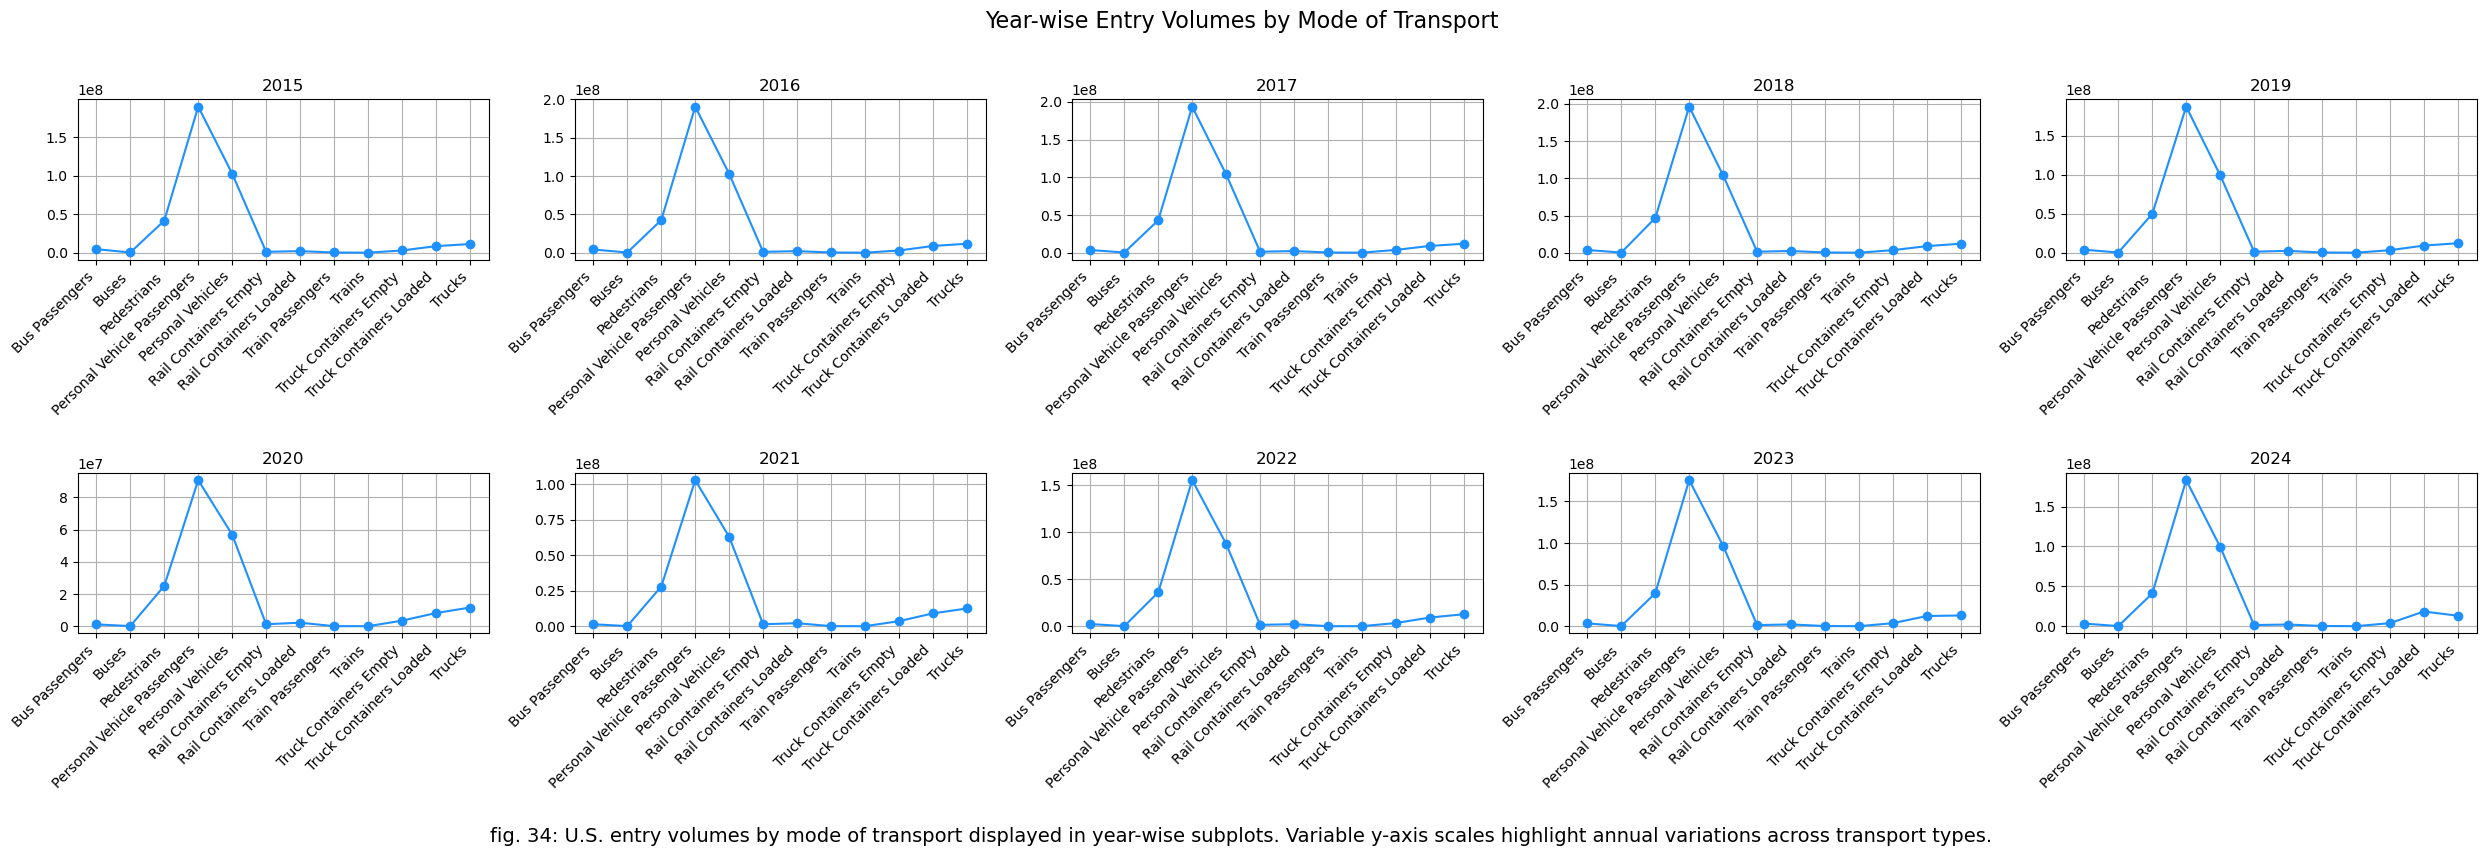

In [232]:
#Year-wise
# Merge to get measure names
merged_df = pd.merge(year_measure_entry, measure_table, on='Measure_Code')

# Unique years
years = sorted(merged_df['Year'].unique())
num_years = len(years)

# Grid layout: 5 charts per row
cols = 5
rows = math.ceil(num_years / cols)

# Fix y-axis limits globally
y_min = merged_df['Value'].min()
y_max = merged_df['Value'].max()

# Create subplots
fig, axes = plt.subplots(rows, cols, figsize=(cols*5, rows*4), squeeze=False)

plt.suptitle('Year-wise Entry Volumes by Mode of Transport', fontsize=16, y=1.02)

for idx, year in enumerate(years):
    row = idx // cols
    col = idx % cols
    ax = axes[row][col]

    # Filter and sort data by measure name for consistent x-axis order
    data = merged_df[merged_df['Year'] == year].sort_values('Measure')

    ax.plot(data['Measure'], data['Value'], marker='o', linestyle='-', color='dodgerblue')
    ax.set_title(f'{year}')
    ax.set_xlabel(' ')
    ax.set_ylabel('')
    #ax.set_ylim(y_min, y_max)  # Fix the y-axis limits across all charts
    ax.grid(True)

    # Rotate x-axis labels for better readability
    plt.setp(ax.get_xticklabels(), rotation=45, ha='right')

# Remove any extra empty subplots
total_plots = rows * cols
for i in range(num_years, total_plots):
    fig.delaxes(axes.flatten()[i])

plt.figtext(0.5, -0.02, 'fig. 34: U.S. entry volumes by mode of transport displayed in year-wise subplots. Variable y-axis scales highlight annual variations across transport types.', ha='center', fontsize=14, fontstyle='normal')
plt.tight_layout()
plt.show()

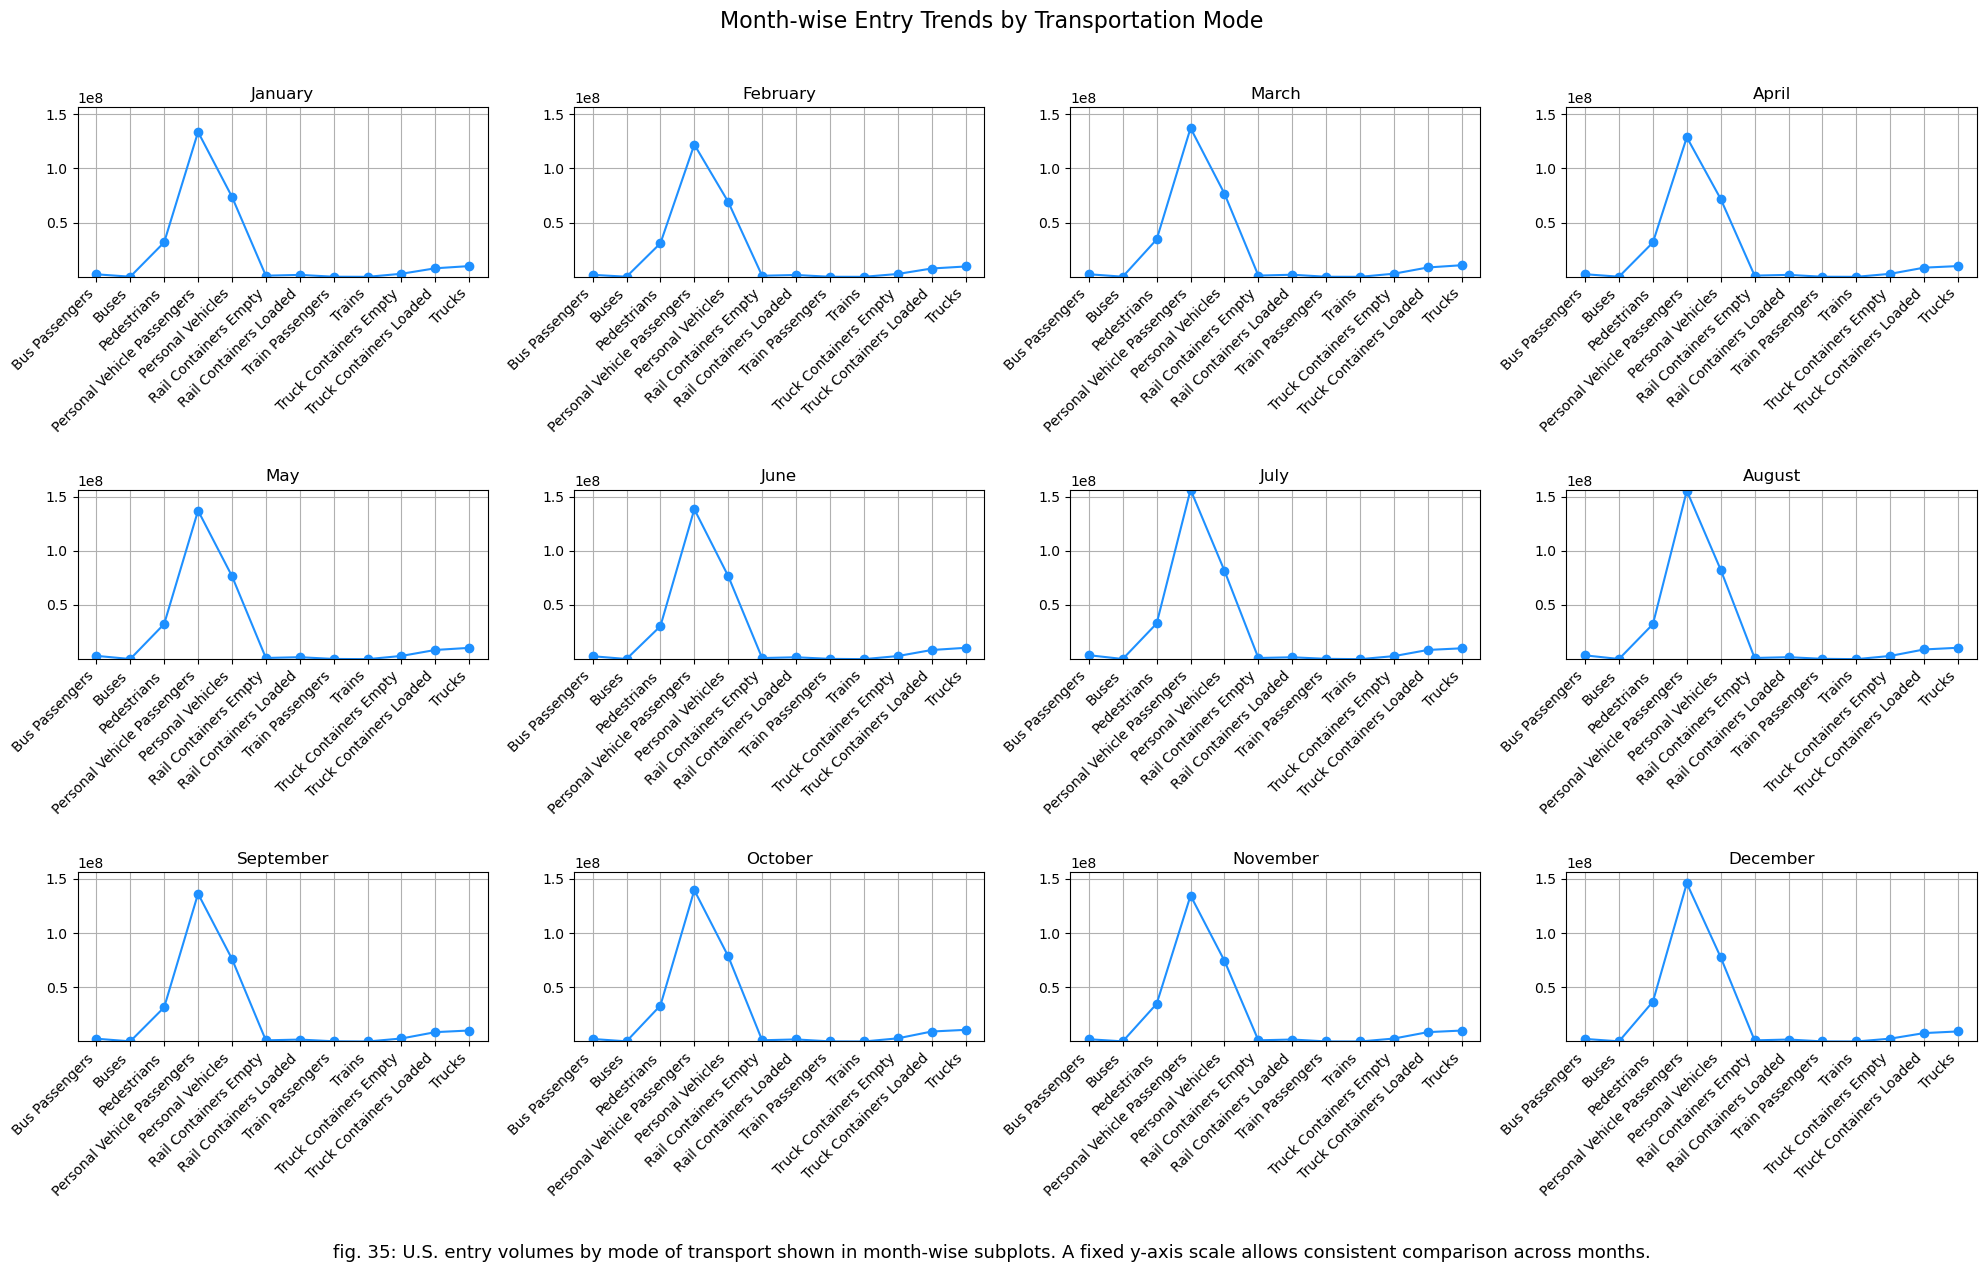

In [233]:
#fixed y-axis scale measure-wise month trend
# Fix data types for merges
month_measure_entry['Month'] = month_measure_entry['Month'].astype(int)
month_table['Month_Number'] = month_table['Month_Number'].astype(int)

# Merge measure names
merged_df = pd.merge(month_measure_entry, measure_table, on='Measure_Code')
# Merge month names
merged_df = pd.merge(merged_df, month_table, left_on='Month', right_on='Month_Number')

# Unique months to plot
months = sorted(merged_df['Month_x'].unique())
num_months = len(months)

# Plot layout: 4 charts per row
cols = 4
rows = math.ceil(num_months / cols)

# Fix y-axis limits globally
y_min = merged_df['Value'].min()
y_max = merged_df['Value'].max()

# Create subplots
fig, axes = plt.subplots(rows, cols, figsize=(cols*5, rows*4), squeeze=False)

plt.suptitle('Month-wise Entry Trends by Transportation Mode', fontsize=16, y=1.02)

for idx, month in enumerate(months):
    row = idx // cols
    col = idx % cols
    ax = axes[row][col]

    # Filter and sort data by Measure for x-axis order
    data = merged_df[merged_df['Month_x'] == month].sort_values('Measure')

    ax.plot(data['Measure'], data['Value'], marker='o', linestyle='-', color='dodgerblue')
    month_name = data['Month_y'].iloc[0]
    ax.set_title(f'{month_name}')
    ax.set_xlabel(' ')
    ax.set_ylabel('')
    ax.set_ylim(y_min, y_max)  # Consistent y-axis limits
    ax.grid(True)

    # Rotate x-axis labels for readability
    plt.setp(ax.get_xticklabels(), rotation=45, ha='right')

# Remove any empty subplots if months < total subplot spaces
total_plots = rows * cols
for i in range(num_months, total_plots):
    fig.delaxes(axes.flatten()[i])

plt.figtext(0.5, -0.02, 'fig. 35: U.S. entry volumes by mode of transport shown in month-wise subplots. A fixed y-axis scale allows consistent comparison across months.', ha='center', fontsize=13, fontstyle='normal')
plt.tight_layout()
plt.show()

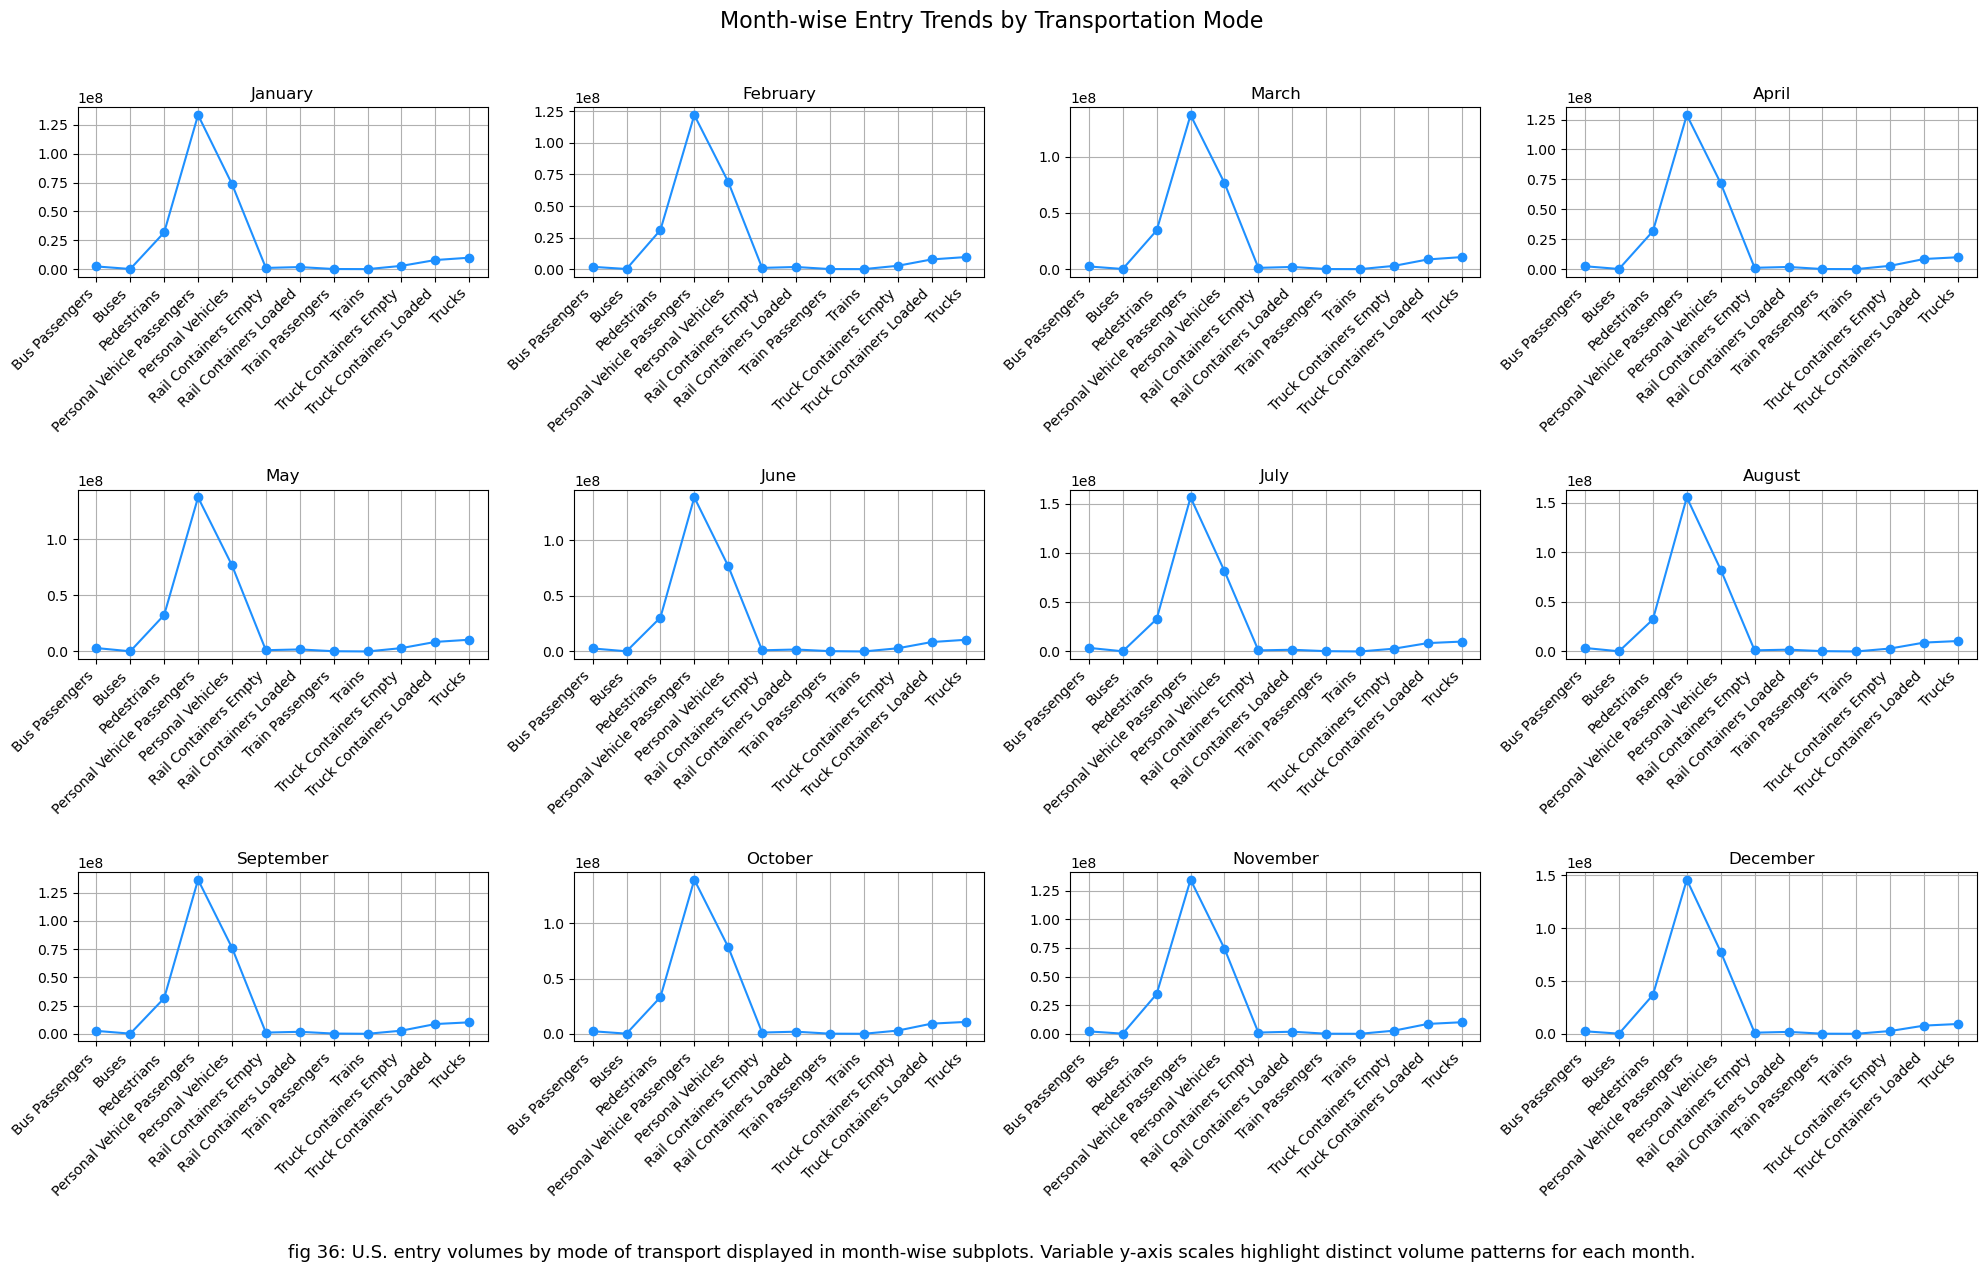

In [234]:
#month-wise measure used
# Fix data types for merges
month_measure_entry['Month'] = month_measure_entry['Month'].astype(int)
month_table['Month_Number'] = month_table['Month_Number'].astype(int)

# Merge measure names
merged_df = pd.merge(month_measure_entry, measure_table, on='Measure_Code')
# Merge month names
merged_df = pd.merge(merged_df, month_table, left_on='Month', right_on='Month_Number')

# Unique months to plot
months = sorted(merged_df['Month_x'].unique())
num_months = len(months)

# Plot layout: 4 charts per row
cols = 4
rows = math.ceil(num_months / cols)

# Fix y-axis limits globally
y_min = merged_df['Value'].min()
y_max = merged_df['Value'].max()

# Create subplots
fig, axes = plt.subplots(rows, cols, figsize=(cols*5, rows*4), squeeze=False)

plt.suptitle('Month-wise Entry Trends by Transportation Mode', fontsize=16, y=1.02)

for idx, month in enumerate(months):
    row = idx // cols
    col = idx % cols
    ax = axes[row][col]

    # Filter and sort data by Measure for x-axis order
    data = merged_df[merged_df['Month_x'] == month].sort_values('Measure')

    ax.plot(data['Measure'], data['Value'], marker='o', linestyle='-', color='dodgerblue')
    month_name = data['Month_y'].iloc[0]
    ax.set_title(f'{month_name}')
    ax.set_xlabel(' ')
    ax.set_ylabel('')
    #ax.set_ylim(y_min, y_max)  # Consistent y-axis limits
    ax.grid(True)

    # Rotate x-axis labels for readability
    plt.setp(ax.get_xticklabels(), rotation=45, ha='right')

# Remove any empty subplots if months < total subplot spaces
total_plots = rows * cols
for i in range(num_months, total_plots):
    fig.delaxes(axes.flatten()[i])

plt.figtext(0.5, -0.02, 'fig 36: U.S. entry volumes by mode of transport displayed in month-wise subplots. Variable y-axis scales highlight distinct volume patterns for each month.', ha='center', fontsize=13, fontstyle='normal')
plt.tight_layout()
plt.show()

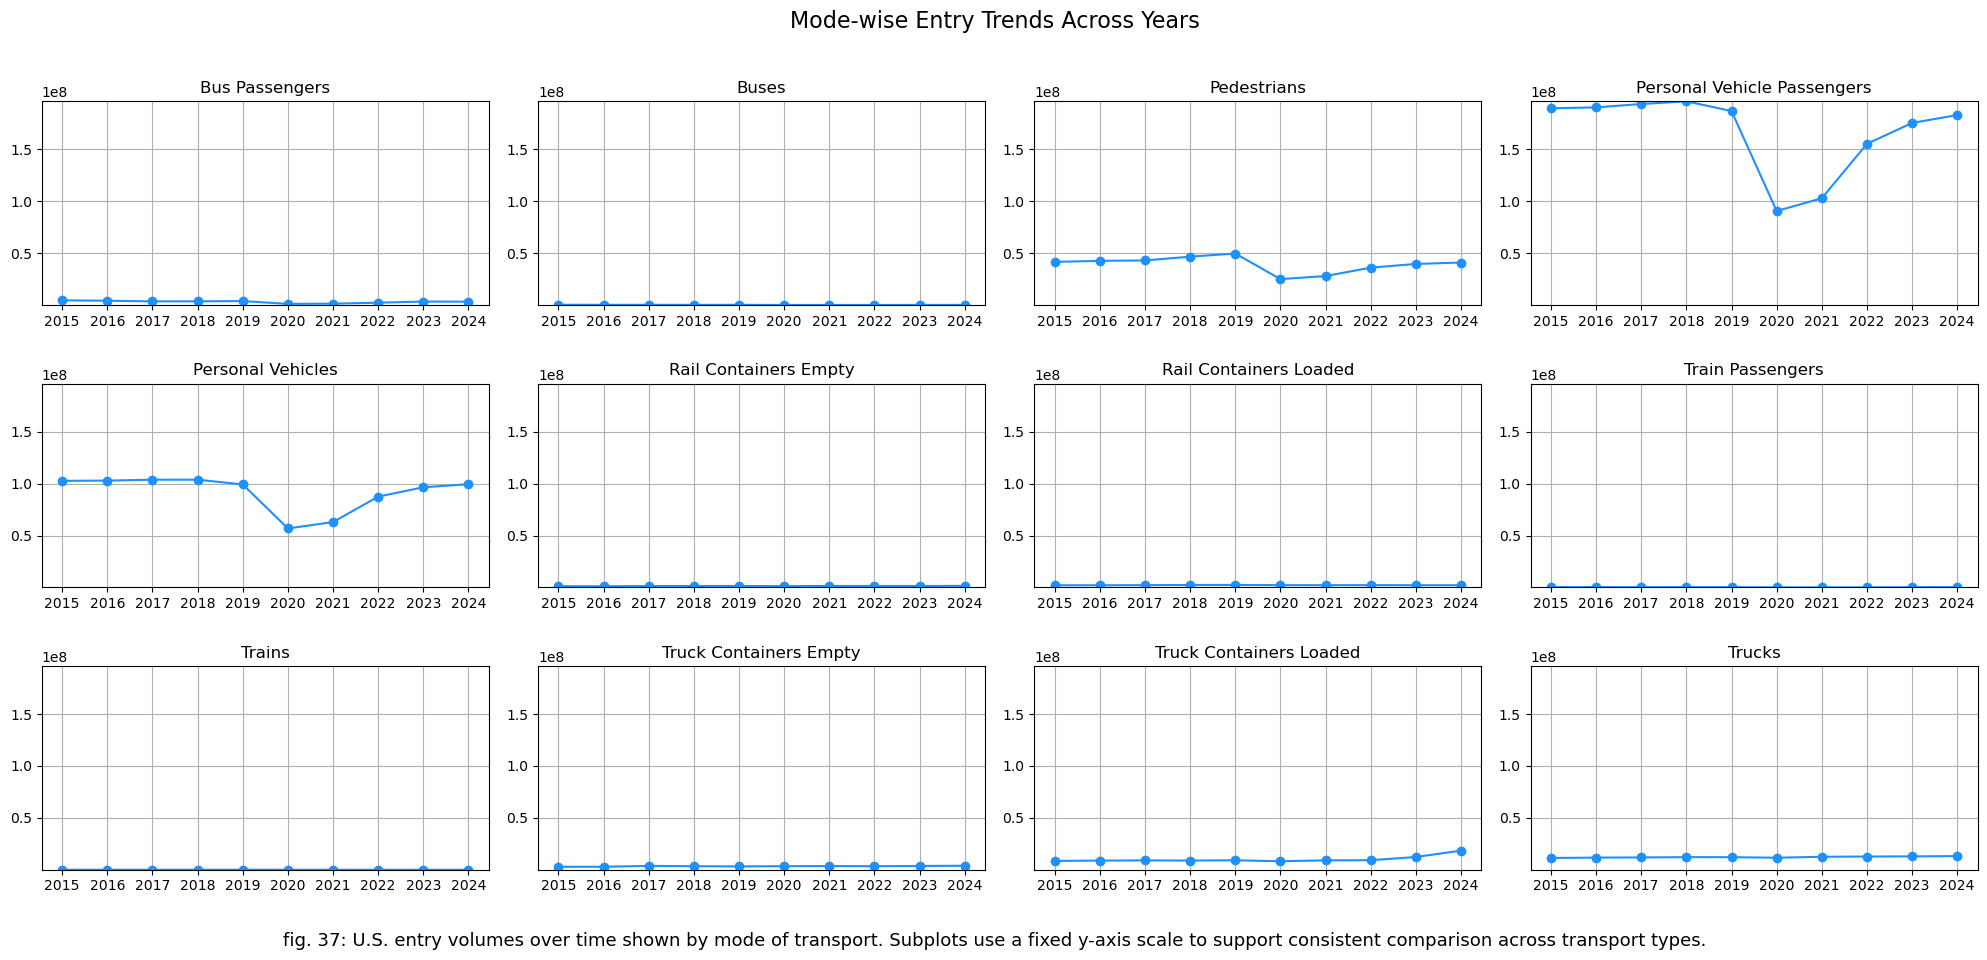

In [235]:
#fixed y-axis scale
# Merge to get measure names
merged_df = pd.merge(year_measure_entry, measure_table, on='Measure_Code')

# Unique measures
measures = sorted(merged_df['Measure'].unique())
num_measures = len(measures)

# Grid layout: 5 charts per row
cols = 4
rows = math.ceil(num_measures / cols)

# Fix y-axis limits globally
y_min = merged_df['Value'].min()
y_max = merged_df['Value'].max()

# Create subplots
fig, axes = plt.subplots(rows, cols, figsize=(cols*5, rows*3), squeeze=False)

plt.suptitle('Mode-wise Entry Trends Across Years', fontsize=16, y=1.02)

for idx, measure in enumerate(measures):
    row = idx // cols
    col = idx % cols
    ax = axes[row][col]

    # Filter and sort data by year for consistent x-axis order
    data = merged_df[merged_df['Measure'] == measure].sort_values('Year')

    ax.plot(data['Year'], data['Value'], marker='o', linestyle='-', color='dodgerblue')
    ax.set_title(measure)
    ax.set_xlabel(' ')
    ax.set_ylabel('')
    ax.set_ylim(y_min, y_max)  # Fix the y-axis limits across all charts
    ax.grid(True)
    ax.xaxis.set_major_locator(MaxNLocator(integer=True)) 

# Remove any extra empty subplots
total_plots = rows * cols
for i in range(num_measures, total_plots):
    fig.delaxes(axes.flatten()[i])

plt.figtext(0.5, -0.02, 'fig. 37: U.S. entry volumes over time shown by mode of transport. Subplots use a fixed y-axis scale to support consistent comparison across transport types.', ha='center', fontsize=13, fontstyle='normal')
plt.tight_layout()
plt.show()

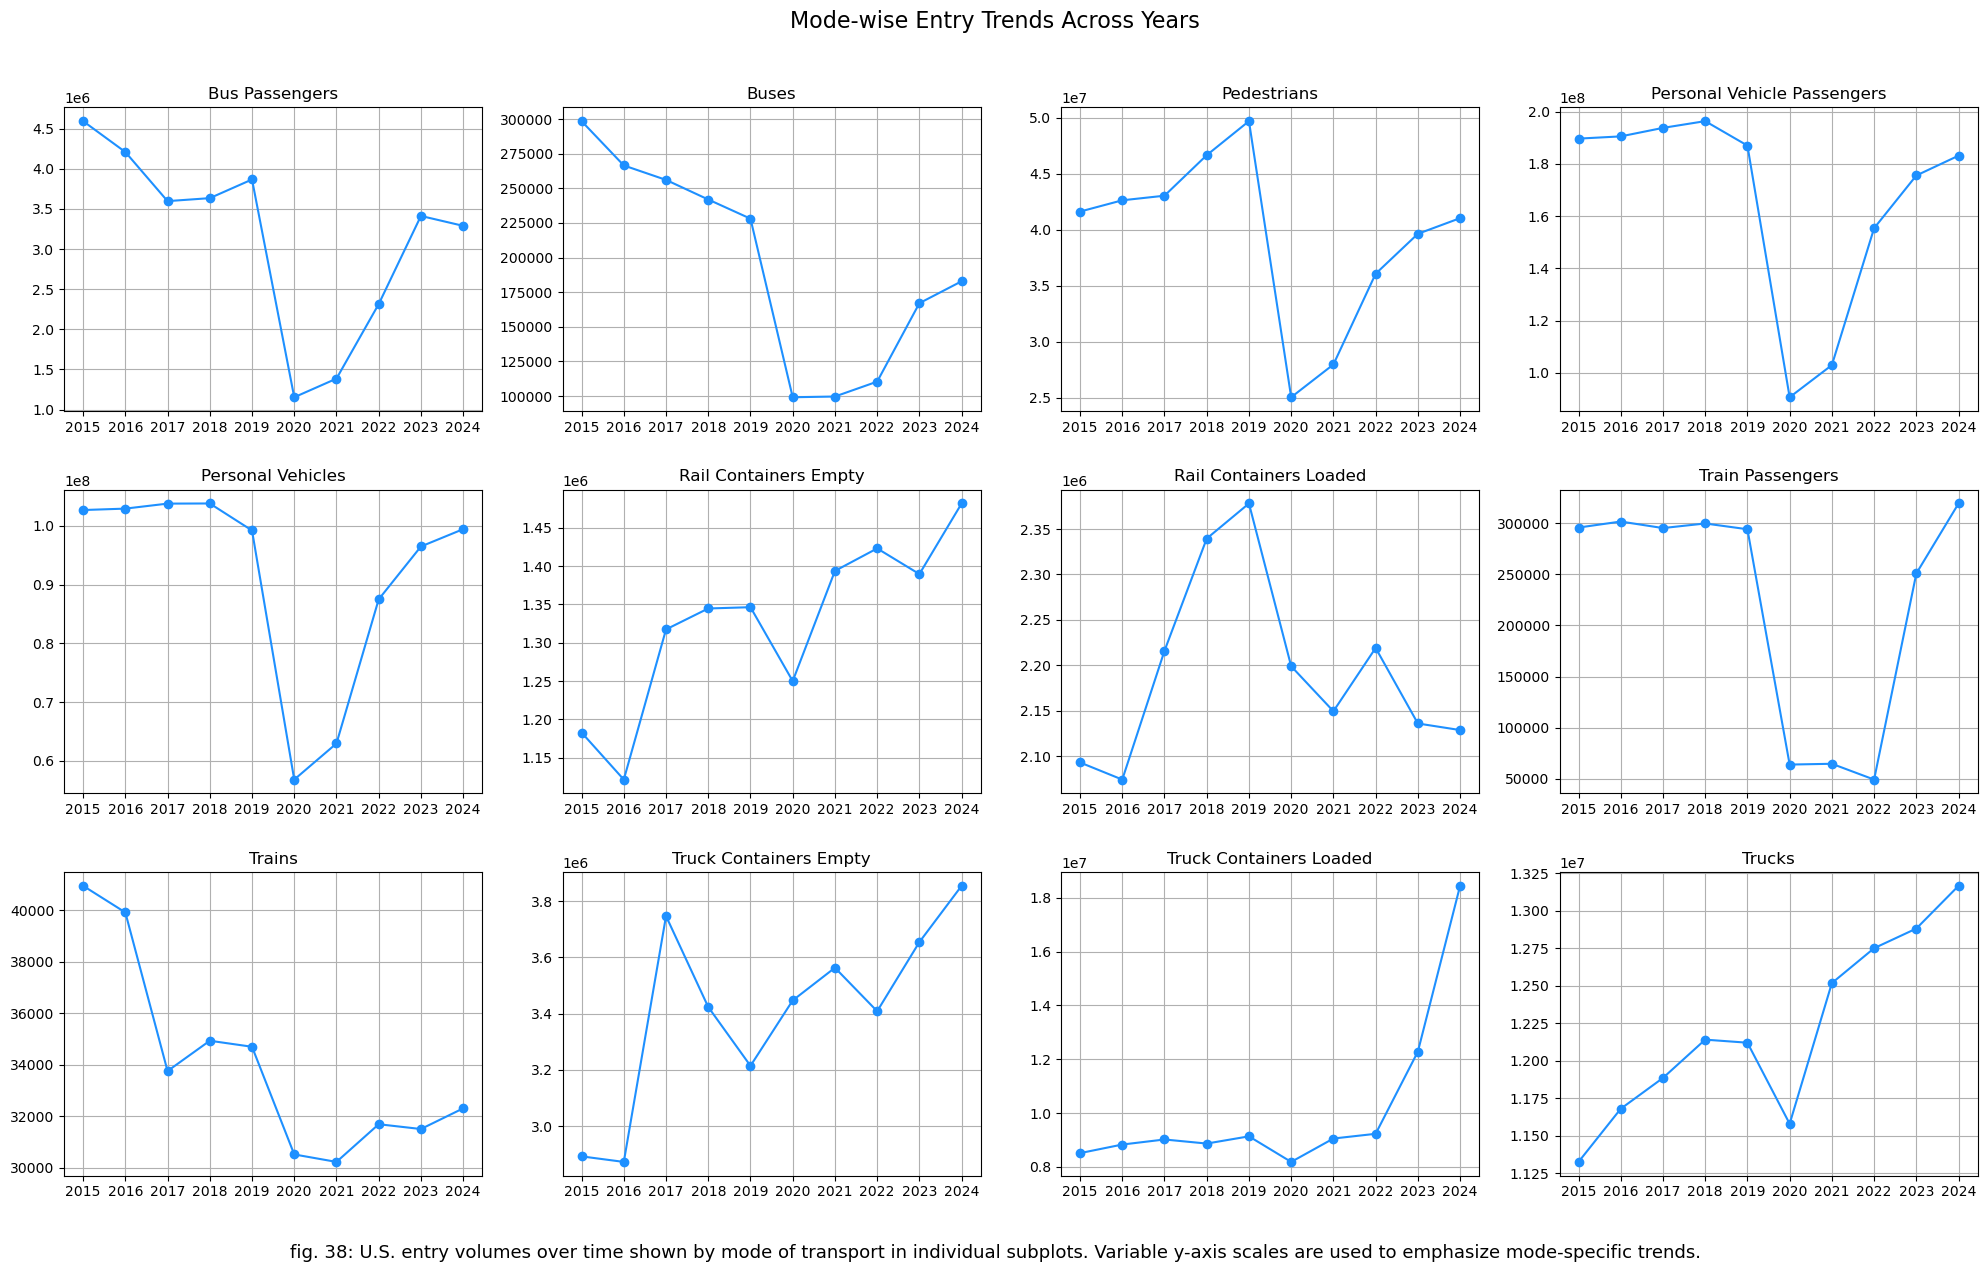

In [236]:
#measure-wise
# Merge to get measure names
merged_df = pd.merge(year_measure_entry, measure_table, on='Measure_Code')

# Unique measures
measures = sorted(merged_df['Measure'].unique())
num_measures = len(measures)

# Grid layout: 5 charts per row
cols = 4
rows = math.ceil(num_measures / cols)

# Fix y-axis limits globally
y_min = merged_df['Value'].min()
y_max = merged_df['Value'].max()

# Create subplots
fig, axes = plt.subplots(rows, cols, figsize=(cols*5, rows*4), squeeze=False)

plt.suptitle('Mode-wise Entry Trends Across Years', fontsize=16, y=1.02)

for idx, measure in enumerate(measures):
    row = idx // cols
    col = idx % cols
    ax = axes[row][col]

    # Filter and sort data by year for consistent x-axis order
    data = merged_df[merged_df['Measure'] == measure].sort_values('Year')

    ax.plot(data['Year'], data['Value'], marker='o', linestyle='-', color='dodgerblue')
    ax.set_title(measure)
    ax.set_xlabel(' ')
    ax.set_ylabel('')
    #ax.set_ylim(y_min, y_max)  # Fix the y-axis limits across all charts
    ax.grid(True)
    ax.xaxis.set_major_locator(MaxNLocator(integer=True)) 

# Remove any extra empty subplots
total_plots = rows * cols
for i in range(num_measures, total_plots):
    fig.delaxes(axes.flatten()[i])

plt.figtext(0.5, -0.02, 'fig. 38: U.S. entry volumes over time shown by mode of transport in individual subplots. Variable y-axis scales are used to emphasize mode-specific trends.', ha='center', fontsize=13, fontstyle='normal')
plt.tight_layout()
plt.show()

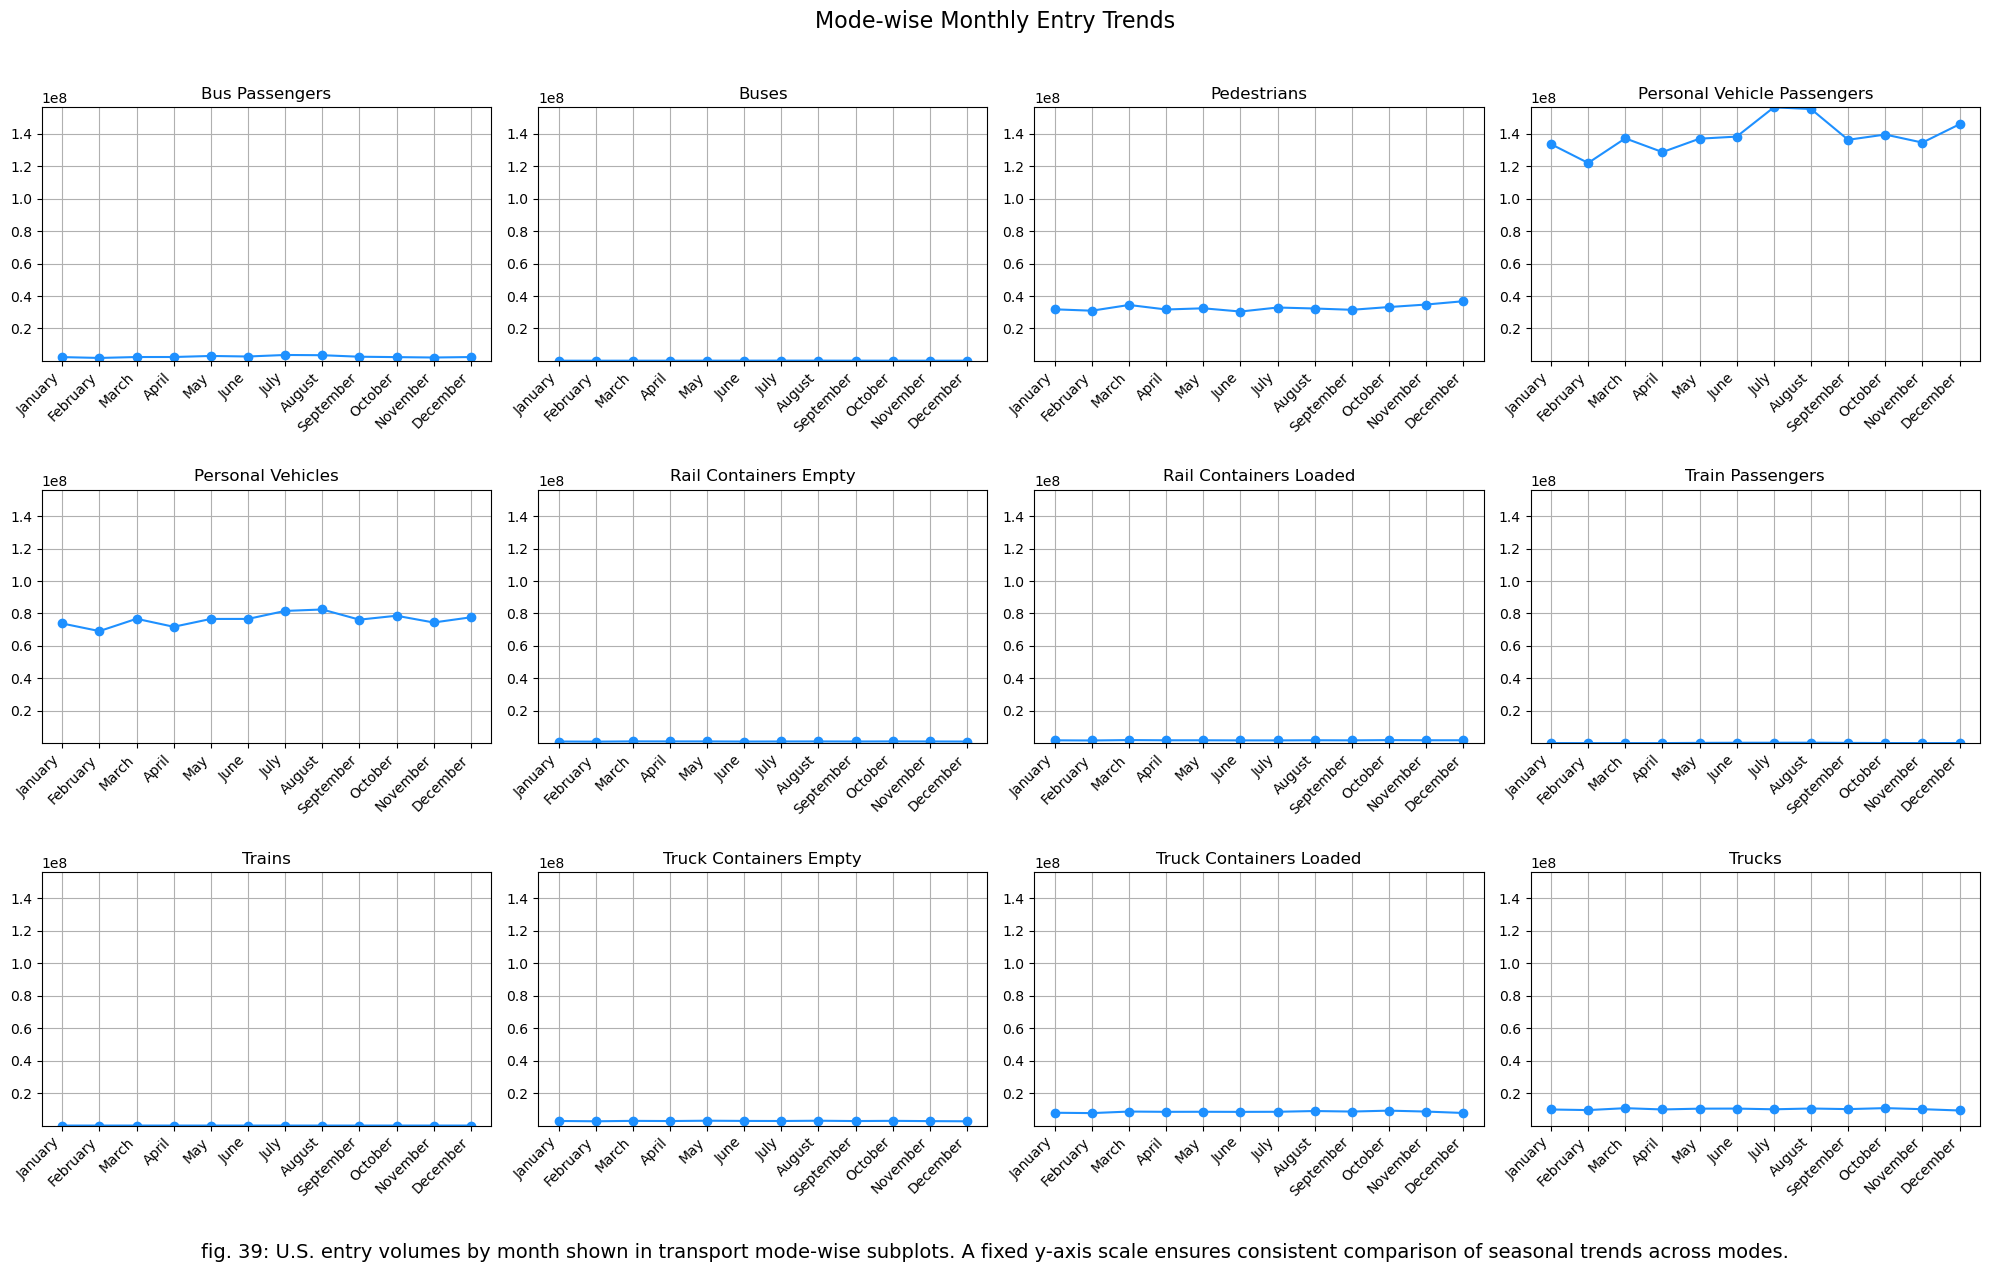

In [237]:
#Monthly trend for measure
month_measure_entry = finalized_broder_crossing_df.groupby(['Month', 'Measure_Code'])['Value'].sum().reset_index()
month_measure_entry = month_measure_entry[['Month', 'Measure_Code', 'Value']]
# Fix data types to avoid merge errors
month_measure_entry['Month'] = month_measure_entry['Month'].astype(int)
month_table['Month_Number'] = month_table['Month_Number'].astype(int)

# Merge measure names
merged_df = pd.merge(month_measure_entry, measure_table, on='Measure_Code')

# Merge month names using correct column names
merged_df = pd.merge(merged_df, month_table, left_on='Month', right_on='Month_Number')

# Unique measures for plotting
measures = sorted(merged_df['Measure'].unique())
num_measures = len(measures)

# Plot layout: 5 charts per row
cols = 4
rows = math.ceil(num_measures / cols)

# Fix y-axis limits globally
y_min = merged_df['Value'].min()
y_max = merged_df['Value'].max()

# Create subplots
fig, axes = plt.subplots(rows, cols, figsize=(cols*5, rows*4), squeeze=False)

plt.suptitle('Mode-wise Monthly Entry Trends', fontsize=16, y=1.02)

for idx, measure in enumerate(measures):
    row = idx // cols
    col = idx % cols
    ax = axes[row][col]

    # Filter data for each measure, sorted by month number for order
    data = merged_df[merged_df['Measure'] == measure].sort_values('Month_Number')

    ax.plot(data['Month_y'], data['Value'], marker='o', linestyle='-', color='dodgerblue')
    ax.set_title(measure)
    ax.set_xlabel(' ')
    ax.set_ylabel('')
    ax.set_ylim(y_min, y_max)  # Consistent y-axis scale
    ax.grid(True)

    # Rotate x-axis labels for readability
    plt.setp(ax.get_xticklabels(), rotation=45, ha='right')

# Remove any empty plots if measures < total subplot spaces
total_plots = rows * cols
for i in range(num_measures, total_plots):
    fig.delaxes(axes.flatten()[i])

plt.figtext(0.5, -0.02, 'fig. 39: U.S. entry volumes by month shown in transport mode-wise subplots. A fixed y-axis scale ensures consistent comparison of seasonal trends across modes.', ha='center', fontsize=14, fontstyle='normal')
plt.tight_layout()
plt.show()

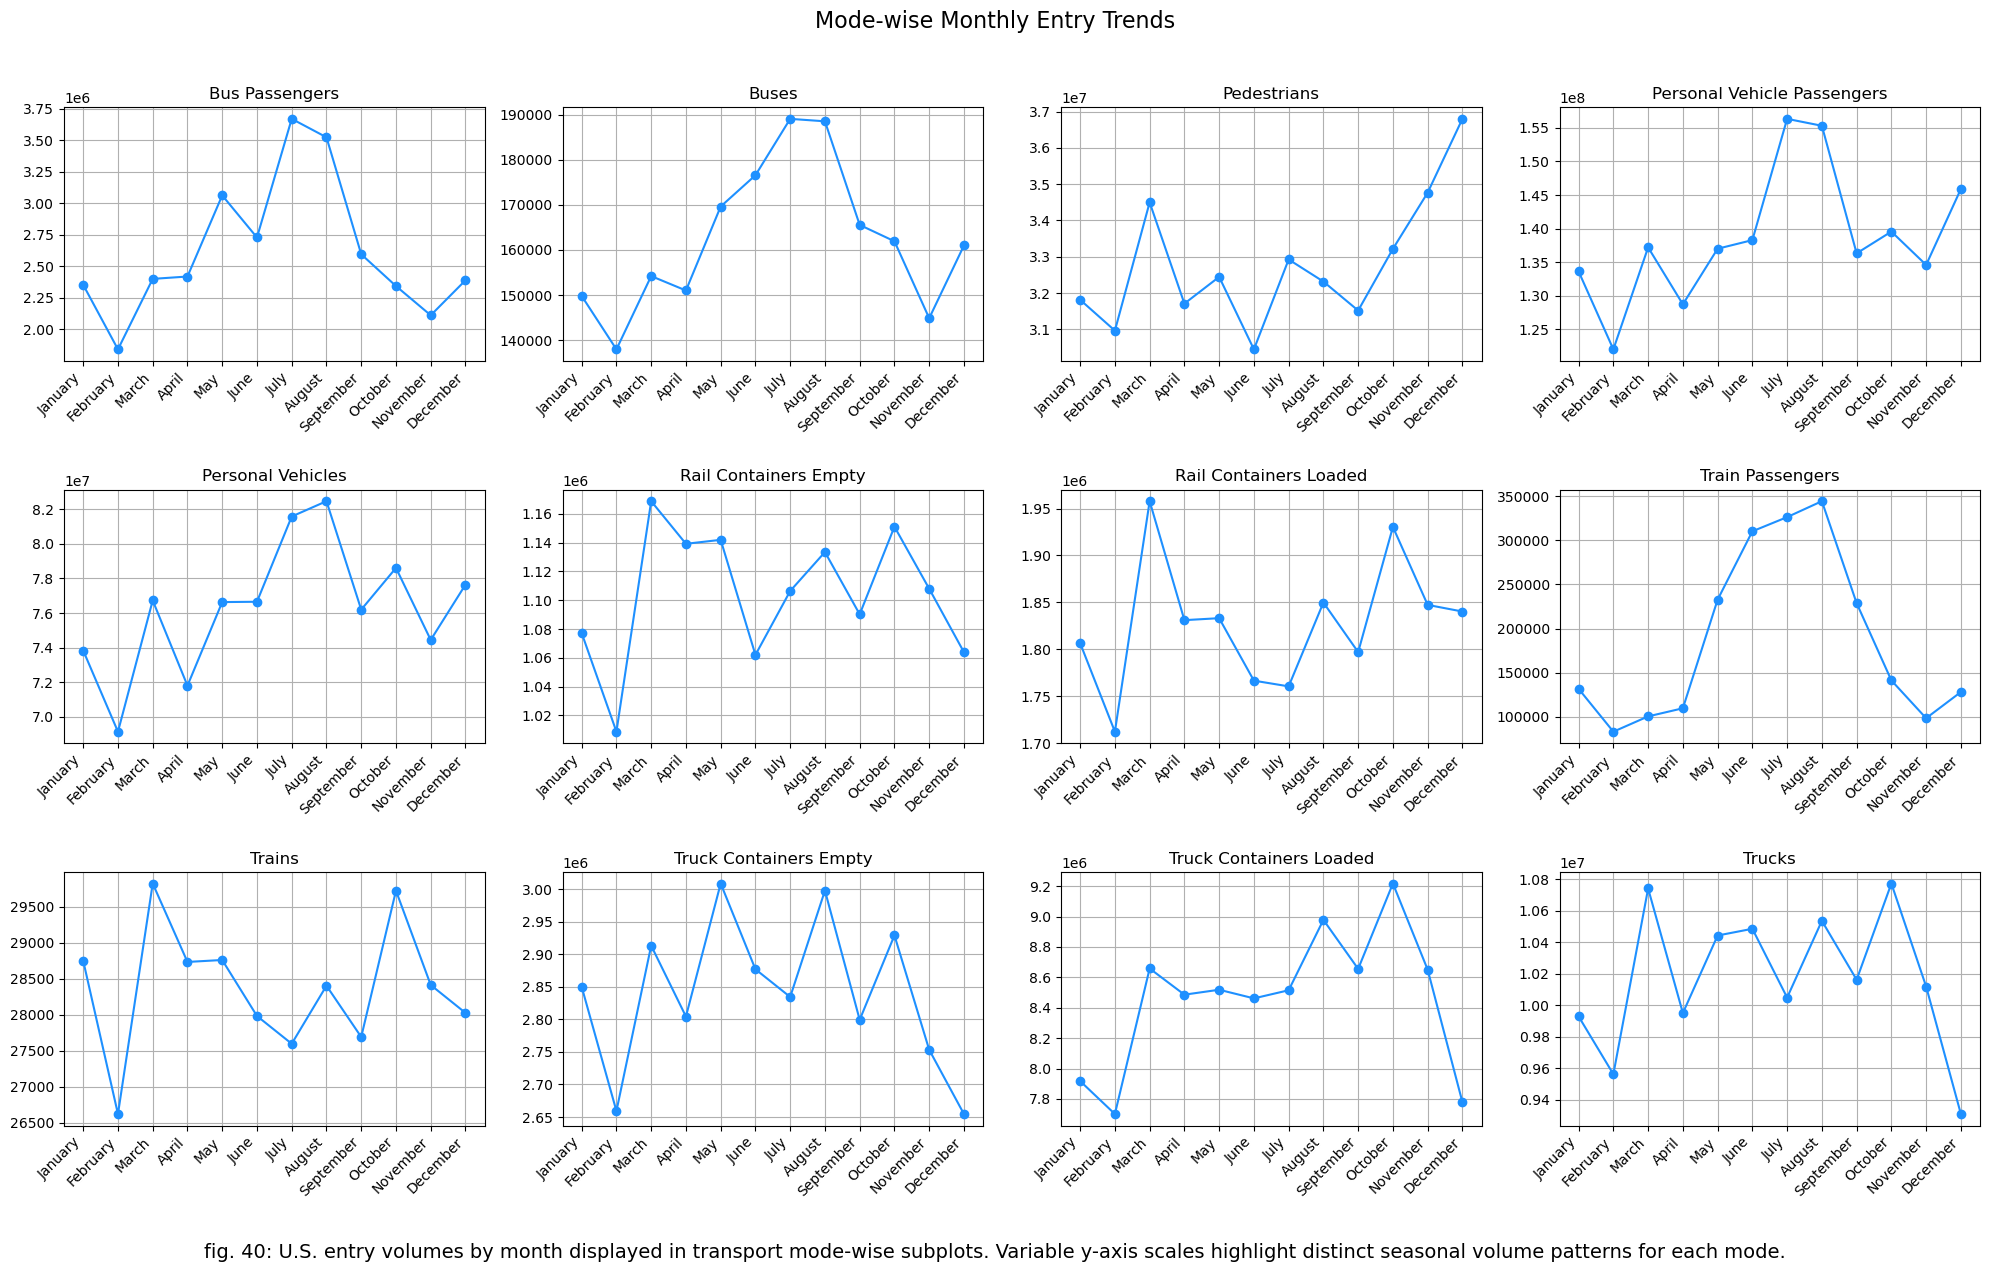

In [238]:
#Monthly trend for measure
month_measure_entry = finalized_broder_crossing_df.groupby(['Month', 'Measure_Code'])['Value'].sum().reset_index()
month_measure_entry = month_measure_entry[['Month', 'Measure_Code', 'Value']]
# Fix data types to avoid merge errors
month_measure_entry['Month'] = month_measure_entry['Month'].astype(int)
month_table['Month_Number'] = month_table['Month_Number'].astype(int)

# Merge measure names
merged_df = pd.merge(month_measure_entry, measure_table, on='Measure_Code')

# Merge month names using correct column names
merged_df = pd.merge(merged_df, month_table, left_on='Month', right_on='Month_Number')

# Unique measures for plotting
measures = sorted(merged_df['Measure'].unique())
num_measures = len(measures)

# Plot layout: 5 charts per row
cols = 4
rows = math.ceil(num_measures / cols)

# Fix y-axis limits globally
y_min = merged_df['Value'].min()
y_max = merged_df['Value'].max()

# Create subplots
fig, axes = plt.subplots(rows, cols, figsize=(cols*5, rows*4), squeeze=False)

plt.suptitle('Mode-wise Monthly Entry Trends', fontsize=16, y=1.02)

for idx, measure in enumerate(measures):
    row = idx // cols
    col = idx % cols
    ax = axes[row][col]

    # Filter data for each measure, sorted by month number for order
    data = merged_df[merged_df['Measure'] == measure].sort_values('Month_Number')

    ax.plot(data['Month_y'], data['Value'], marker='o', linestyle='-', color='dodgerblue')
    ax.set_title(measure)
    ax.set_xlabel(' ')
    ax.set_ylabel('')
    #ax.set_ylim(y_min, y_max)  # Consistent y-axis scale
    ax.grid(True)

    # Rotate x-axis labels for readability
    plt.setp(ax.get_xticklabels(), rotation=45, ha='right')

# Remove any empty plots if measures < total subplot spaces
total_plots = rows * cols
for i in range(num_measures, total_plots):
    fig.delaxes(axes.flatten()[i])

plt.figtext(0.5, -0.02, 'fig. 40: U.S. entry volumes by month displayed in transport mode-wise subplots. Variable y-axis scales highlight distinct seasonal volume patterns for each mode.', ha='center', fontsize=14, fontstyle='normal')
plt.tight_layout()
plt.show()